#•••••FINAL PROJECT•••••
*Phân tích dữ liệu - IE224*
--------------------------------------

##Group Information
***Sinh viên 1:**<br>
- STT: 30 <br>
- Họ và tên: Nguyễn Minh Hiếu <br>
- MSSV: 20521326 <br>

***Sinh viên 2:**<br>
- STT: 36 <br>
- Họ và tên: Nguyễn Thành Nhân <br>
- MSSV: 20521701 <br>

--------------------------------
*Bài làm được thực hiện trên Google Colab*

##1.Loading libraries and dataset

###Import libraries

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#model libraries

In [ ]:
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegression, RidgeClassifier, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA, FactorAnalysis, FastICA
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, make_scorer

###Loading Dataset

In [ ]:
df = pd.read_csv('/content/Customer Churn.csv')

##2.Understanding the data

In [ ]:
df.head()

,Member No_,Total_Lifetime_Spending,Correct_Category_Member,Num_of_Win,Num_of_Drop,Number_of_purchases,Discount_code_usage_count,Avg_Days_Between_Transactions,Gender,Age_Group,Store_No.,Purchase_Type,Customer_Type,churn
0,98000030,20655000,Bronze,0,0,11,1,38.468750,Male,25-34 Years,HN,Gift to Others,Individual,0
1,13484932,27830000,Silver,1,0,5,0,46.428571,Female,18-24 Years,HCM,For Self,Individual,1
2,92000058,43576000,Silver,2,1,6,8,290.142857,Male,NaN,HN,For Self,Individual,0
3,193000015,22744500,Bronze,0,0,10,3,127.700000,Female,NaN,HN,For Self,Individual,0
4,199000026,24720000,Silver,1,0,4,0,15.750000,Female,NaN,HCM,For Self,Individual,1


In [ ]:
df.columns.values

array(['Member No_', 'Total_Lifetime_Spending', 'Correct_Category_Member',
       'Num_of_Win', 'Num_of_Drop', 'Number_of_purchases',
       'Discount_code_usage_count', 'Avg_Days_Between_Transactions',
       'Gender', 'Age_Group', 'Store_No.', 'Purchase_Type',
       'Customer_Type', 'churn'], dtype=object)

**Nhận xét:* Đây là bộ dữ liệu cho biết những thông tin về khách hàng rời bỏ của một công ty trang sức, các thuộc tính như sau:
- **Khách hàng rời bỏ - không quay trở lại mua hàng trong 12 tháng**: Cột thuộc tính **"churn"** *(biến target)*
- **Thông tin cá nhân cơ bản của khách hàng**:
  + Giới tính **"Gender"**,
  + Nhóm tuổi **"Age_Group"**,
  + Nơi khách hàng mua hàng lần cuối **"Store_No."**,
  + Mục đích mua hàng **"Purchase_Type"**,
  + Loại khách hàng **"Customer_Type"**

- **Thông tin sử dụng dịch vụ của khách hàng**:
  + Tổng số tiền khách hàng đã mua **"Total_Lifetime_Spending"**
  + Rank của khách hàng **"Correct_Category_Member"**
  + Hạng của khách hàng **"Member_Category"**
  + Số lần khách hàng thăng hạng **"Num_of_Win"**
  + Số lần khách hàng xuống hạng **"Num_of_Drop"**
  + Số lần mua hàng **"Number_of_purchases "**
  + Số lần sử dụng chương trình giảm giá **"Discount_code_usage_count"**
  + Trung bình số ngày khách hàng quay lại mua hàng **"Avg_Days_Between_Transactions"**


In [ ]:
df.shape

(5138, 14)

*Bộ dữ liệu có 5138 dòng dữ liệu và 14 cột thuộc tính

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5138 entries, 0 to 5137
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Member No_                     5138 non-null   object 
 1   Total_Lifetime_Spending        5138 non-null   int64  
 2   Correct_Category_Member        5138 non-null   object 
 3   Num_of_Win                     5138 non-null   int64  
 4   Num_of_Drop                    5138 non-null   int64  
 5   Number_of_purchases            5138 non-null   int64  
 6   Discount_code_usage_count      5138 non-null   int64  
 7   Avg_Days_Between_Transactions  5138 non-null   float64
 8   Gender                         5065 non-null   object 
 9   Age_Group                      4585 non-null   object 
 10  Store_No.                      5138 non-null   object 
 11  Purchase_Type                  5016 non-null   object 
 12  Customer_Type                  5013 non-null   o

*Nhận xét:
- Các thuộc tính của bộ dữ liệu có kiểu thuộc tính đúng với mong đợi
- Dễ thấy bộ dữ liệu có chứa khá nhiều dữ liệu khuyết

In [ ]:
df['churn'].value_counts()

1    3710
0    1428
Name: churn, dtype: int64

→ Biến mục tiêu dùng để dự đoán là **"Churn"**, với:
  + Khách hàng còn mua hàng tương ứng với giá trị **"0"**
  + ***Khách hàng không còn mua hàng (khách hàng rời bỏ)*** tương ứng với giá trị **"1"**


##3.Visualize missing values

###Statistics

In [ ]:
df.isnull().sum()

Member No_                         0
Total_Lifetime_Spending            0
Correct_Category_Member            0
Num_of_Win                         0
Num_of_Drop                        0
Number_of_purchases                0
Discount_code_usage_count          0
Avg_Days_Between_Transactions      0
Gender                            73
Age_Group                        553
Store_No.                          0
Purchase_Type                    122
Customer_Type                    125
churn                              0
dtype: int64

* Các thuộc tính có chứa missing values đều là các thông tin thu thập từ phía khách hàng, nếu khách hàng từ chối không cung cấp thì sẽ tự động gán thành NaN

In [ ]:
missing_symbols = [".", "?", "_", "-", "", "None", "NULL", "Not", "|"]
filtered_missing_df = df[df.isin(missing_symbols).any(axis=1)]
filtered_missing_df

,Member No_,Total_Lifetime_Spending,Correct_Category_Member,Num_of_Win,Num_of_Drop,Number_of_purchases,Discount_code_usage_count,Avg_Days_Between_Transactions,Gender,Age_Group,Store_No.,Purchase_Type,Customer_Type,churn


* Kiểm tra bộ dữ liệu thì không còn chứa giá trị khuyết nào khác (thể hiện bằng cách khác)

###Visualization missing values

<Axes: >

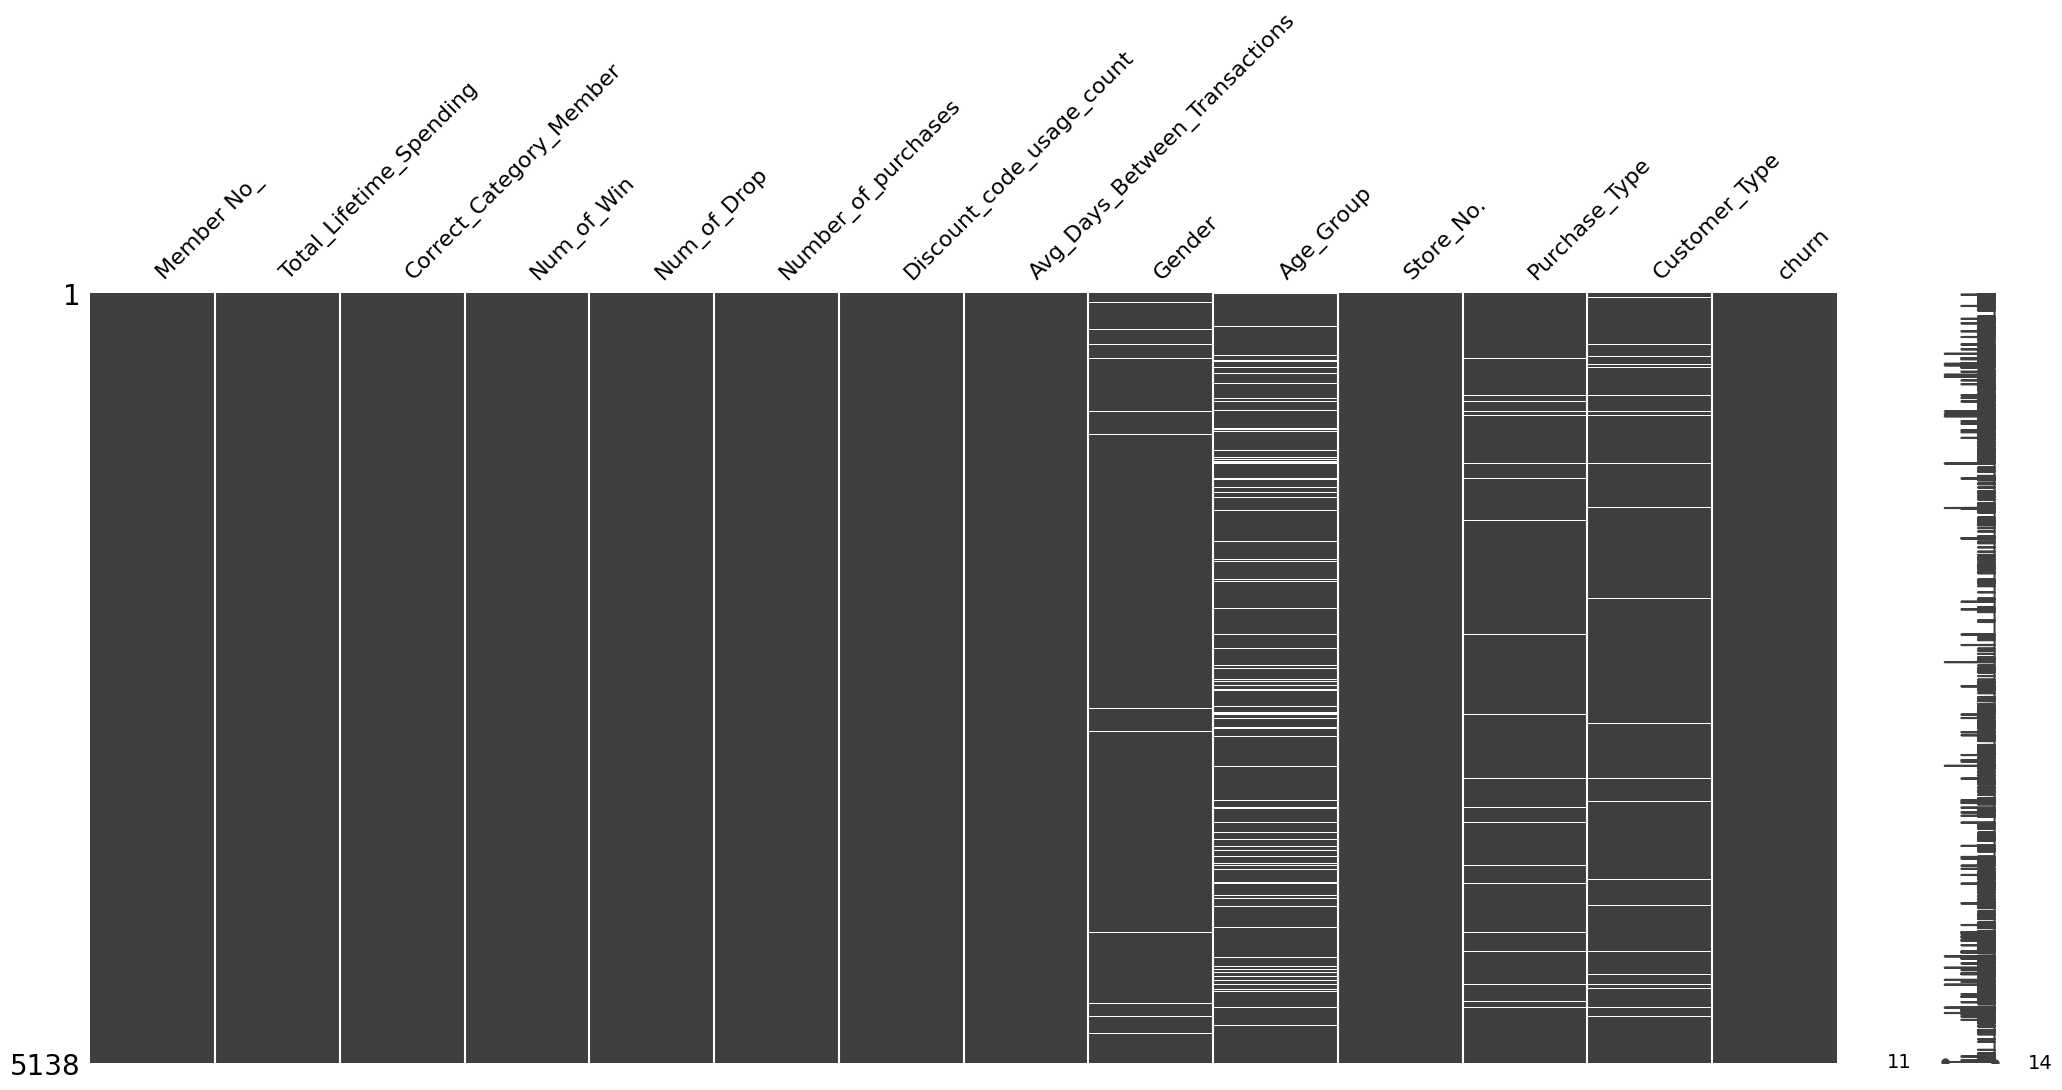

In [ ]:
msno.matrix(df)

* Thông qua sử dụng ma trận này, dễ dàng nhận thấy được mẫu bị thiếu trong bộ dữ liệu.
* Từ ma trận trên, ta thấy thuộc tính **"Age Group"** khá thưa thớt → chứa nhiều dữ liệu khuyết. Ngoài ra thuộc tính **"Gender"**, **"Purchase Type"** và **"Customer Type"** cũng có chứa ít dữ liệu khuyết.


##4.Processing missing values

* Vì cả 4 cột dữ liệu khuyết đều là thông tin được cung cấp từ khách hàng, do đó chúng emsẽ dùng giá trị đại diện cho những giá trị khuyết để khi đưa vào huấn luyện mô hình, các sample này sẽ mang giá trị đại diện cho tiêu cực.
  + Đối với cột thuộc tính **"Gender"**, sử dụng giá trị **"Unknown"** đại diện cho dữ liệu khuyết.
  + Đối với cột thuộc tính **"Age Group"**, sử dụng giá trị **"Unknown"** đại diện cho dữ liệu khuyết.
  + Đối với cột thuộc tính **"Purchase Type"**, sử dụng giá trị **"Unknown"** đại diện cho dữ liệu khuyết.
  + Đối với cột thuộc tính **"Customer Type"**, sử dụng giá trị **"Unknown"** đại diện cho dữ liệu khuyết.

In [ ]:
df['Purchase_Type'].replace(np.nan, value='Unknown', inplace = True)
df['Purchase_Type'].value_counts()

For Self          4416
Gift to Others     600
Unknown            122
Name: Purchase_Type, dtype: int64

In [ ]:
df['Customer_Type'].replace(np.nan, value='Unknown', inplace = True)
df['Customer_Type'].value_counts()

Individual    4920
Unknown        125
Company         93
Name: Customer_Type, dtype: int64

In [ ]:
df['Age_Group'].replace(np.nan, value='Unknown', inplace = True)
df['Age_Group'].value_counts()

25-34 Years     2211
18-24 Years     1180
35-44 Years     1005
Unknown          553
45-54 Years      174
More than 55      15
Name: Age_Group, dtype: int64

In [ ]:
df['Gender'].replace(np.nan, value='Unknown', inplace = True)
df['Gender'].value_counts()

Female     4419
Male        646
Unknown      73
Name: Gender, dtype: int64

In [ ]:
df.isnull().sum()

Member No_                       0
Total_Lifetime_Spending          0
Correct_Category_Member          0
Num_of_Win                       0
Num_of_Drop                      0
Number_of_purchases              0
Discount_code_usage_count        0
Avg_Days_Between_Transactions    0
Gender                           0
Age_Group                        0
Store_No.                        0
Purchase_Type                    0
Customer_Type                    0
churn                            0
dtype: int64

##5.Understanding and Processing Outlier Values

###Statistics and analysis

* Ngoại trừ biến mục tiêu thuộc kiểu số nhưng là biến phân lớp nhị phân, bộ dữ liệu còn 6 biến số (numerical).


In [ ]:
df['Total_Lifetime_Spending'].value_counts()

20610000    6
20310000    6
20170000    6
21510000    5
23320000    5
           ..
42112000    1
9669000     1
30580000    1
10527000    1
36006000    1
Name: Total_Lifetime_Spending, Length: 4554, dtype: int64

In [ ]:
df['Num_of_Win'].value_counts()

1    3802
0     690
2     558
3      72
4      12
5       4
Name: Num_of_Win, dtype: int64

In [ ]:
df['Num_of_Drop'].value_counts()

0    4640
1     435
2      58
3       4
4       1
Name: Num_of_Drop, dtype: int64

In [ ]:
df['Number_of_purchases'].value_counts()

2      1870
3      1039
4       607
5       419
6       265
       ... 
112       1
52        1
79        1
33        1
43        1
Name: Number_of_purchases, Length: 61, dtype: int64

In [ ]:
df['Discount_code_usage_count'].value_counts()

0      1947
1       395
3       353
2       342
4       223
       ... 
253       1
218       1
53        1
111       1
55        1
Name: Discount_code_usage_count, Length: 88, dtype: int64

In [ ]:
df['Avg_Days_Between_Transactions'].value_counts()

1.000000      61
2.000000      36
7.000000      33
1.500000      33
6.000000      32
              ..
36.750000      1
128.833333     1
108.000000     1
97.571429      1
25.357143      1
Name: Avg_Days_Between_Transactions, Length: 2158, dtype: int64

Qua kiểm tra số giá trị và số lượng của mỗi giá trị, 3 biến 'Num of Win', 'Num of Drop' có ít giá trị và liên tục trong khoảng từ 0 - 5. Do đó sẽ tập trung vào các giá trị còn lại để xử lý nhiễu

* Kiểm tra các giá trị phạm vi và vẽ biểu đồ histplot để xem tổng quát miền dữ liệu

In [ ]:
def calc_histplot(data):
    mean = data.mean()
    median = data.median()
    mode1 = data.mode().iloc[0]
    mode2 = data.mode()
    max = data.max()
    min = data.min()

    # Vẽ biểu đồ histogram
    plt.figure(figsize=(16,9))
    plt.hist(data, bins=200, alpha=0.5, color='b', edgecolor='k', label='Dữ liệu')
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(median, color='g', linestyle='dashed', linewidth=1, label='Median')
    plt.axvline(mode1, color='y', linestyle='dashed', linewidth=1, label='Mode')

    plt.xlabel('Giá trị')
    plt.ylabel('Tần suất')
    print(f"Mean (giá trị trung bình): {mean}")
    print(f"Median (giá trị trung vị): {median}")
    print(f"Mode (Giá trị xuất hiện nhiều nhất):")
    print(mode2)
    print(f"Max (mode): {max}")
    print(f"Min (mode): {min}")
    plt.show()

In [ ]:
def boxplot_num(df, name2):
    fig = px.box(df, x='churn', y = name2)

    # Update yaxis properties
    fig.update_yaxes(title_text=name2, row=1, col=1)
    # Update xaxis properties
    fig.update_xaxes(title_text='churn', row=1, col=1)

    # Update size and title
    fig.update_layout(autosize=True, width=750, height=600,
        title_font=dict(size=25, family='Courier'),
        title=f'<b>{name2} vs Churn</b>',
    )

    fig.show()

*Biến "Total_Lifetime_Spending"

Mean (giá trị trung bình): 44802303.45270533
Median (giá trị trung vị): 28578000.0
Mode (Giá trị xuất hiện nhiều nhất):
0    20170000
1    20310000
2    20610000
Name: Total_Lifetime_Spending, dtype: int64
Max (mode): 7244613000
Min (mode): 1153000


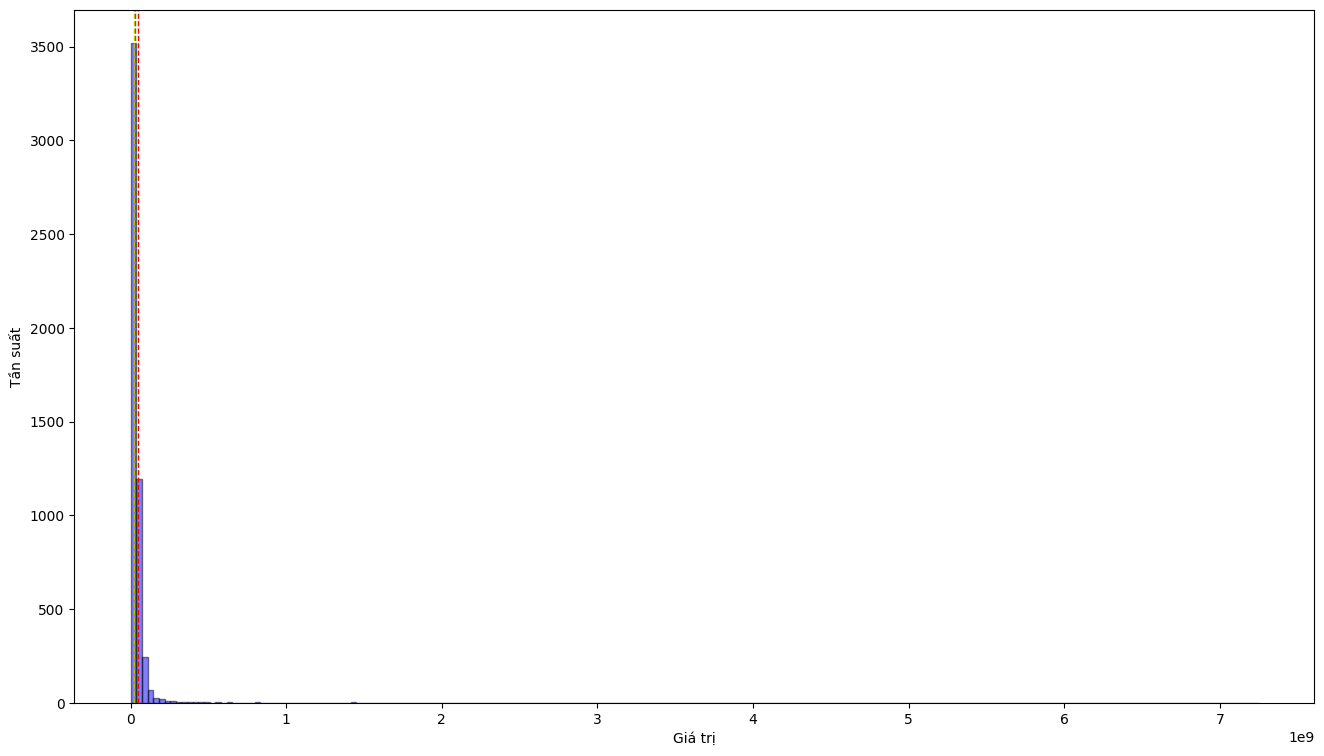

In [ ]:
calc_histplot(df['Total_Lifetime_Spending'])

In [ ]:
boxplot_num(df, 'Total_Lifetime_Spending')

* *Nhận xét:* Qua 2 biểu đồ ta thấy, biến 'Total_Lifetime_Spending' có chứa nhiều outlier values khiến cho hình dạng các biểu đồ không thể quan sát rõ. Ngoài ra các giá trị của biến gồm:
  - Mean (giá trị trung bình): 44802303.45270533
  - Median (giá trị trung vị): 28578000.0
  - Mode (Giá trị xuất hiện nhiều nhất):

|STT|Value|
| :- | :-: |
|0|20170000|
|1|20310000|
|2|20610000|

Tuy nhiên các giá trị Max của biến thì lên tới con số 7B (7 tỷ) và Min thì bằng 1153000, chênh lệch rất nhiều so với các khoảng.
* Ở biểu đồ Boxplot có thể thấy, các điểm có giá trị trên 1B(1 tỷ) rất ít

*Quan sát các giá trị ở 2 đầu biến

In [ ]:
TLS = df['Total_Lifetime_Spending'].value_counts().reset_index().sort_values(by='index')
TLS.columns = ['Value', 'Count']

In [ ]:
TLS.head(20)

,Value,Count
3742,1153000,1
4065,1364000,1
4012,1432000,1
4183,1671000,1
3950,1745000,1
4298,1820000,1
685,1884000,1
4139,2045000,1
4339,2297500,1
3563,2329000,1


In [ ]:
TLS.tail(50)

,Value,Count
3237,260011500,1
2550,262933500,1
2996,263153000,1
1144,270622500,1
1129,273275000,1
1513,282670000,1
1608,287953500,1
2528,290604000,1
3044,291645200,1
1745,293596000,1


* *Nhận xét:* Vì đây là biến thể hiện tổng số tiền khách hàng đã mua hàng và xét thấy sẽ có những trường hợp như khách hàng mua hàng một lần với số tiền rất lớn, hoặc khách hàng vốn mua hàng rất nhiều và tổng số tiền hàng rất lớn nhưng vì một vài lí do gì đó họ không còn mua hàng, hoặc khách hàng vẫn còn mua hàng thường xuyên nhưng chỉ đối với những mặt hàng giá rất nhỏ. Nên chúng em sẽ chỉ loại bỏ các outlier ở mức quá cao hoặc quá thấp và có mật độ thấp

*Biến "Number_of_purchases"

Mean (giá trị trung bình): 5.473141300116777
Median (giá trị trung vị): 3.0
Mode (Giá trị xuất hiện nhiều nhất):
0    2
Name: Number_of_purchases, dtype: int64
Max (mode): 653
Min (mode): 1


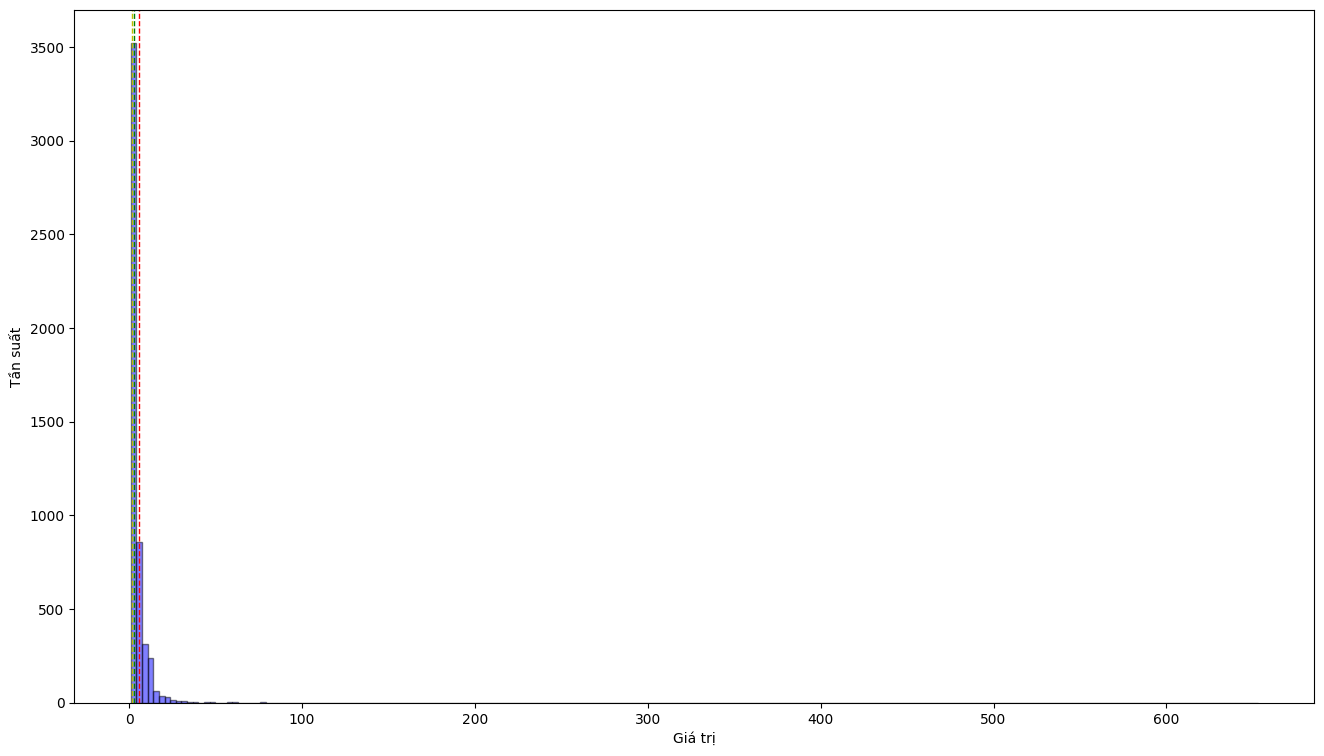

In [ ]:
calc_histplot(df['Number_of_purchases'])

In [ ]:
boxplot_num(df, 'Number_of_purchases')

* *Nhận xét:* Qua 2 biểu đồ ta thấy, biến 'Number_of_purchases' có chứa nhiều outlier values khiến cho hình dạng các biểu đồ không thể quan sát rõ. Ngoài ra các giá trị của biến gồm:
  - Mean (giá trị trung bình): 5.473141300116777
  - Median (giá trị trung vị): 3.0
  - Mode (Giá trị xuất hiện nhiều nhất): 2

Giá trị Max của biến thì lên tới con số 653, chênh lệch rất nhiều so với giá trị khoảng.
* Ở biểu đồ Boxplot có thể thấy, các điểm có giá trị trên 60 món rất ít

*Quan sát các giá trị ở 2 đầu biến

In [ ]:
NOP = df['Number_of_purchases'].value_counts().reset_index().sort_values(by='index')
NOP.columns = ['Value', 'Count']

In [ ]:
NOP.head(20)

,Value,Count
21,1,7
0,2,1870
1,3,1039
2,4,607
3,5,419
4,6,265
5,7,174
6,8,127
7,9,96
8,10,93


In [ ]:
NOP.tail(50)

,Value,Count
10,12,69
11,13,52
12,14,44
13,15,24
14,16,23
16,17,16
15,18,16
17,19,15
27,20,4
18,21,12


* *Nhận xét:* Dễ thấy các giá trị lớn hơn 40 có rất ít giá trị. Nên chúng em sẽ chỉ loại bỏ các outlier ở mức quá cao này.

*Biến "Discount_code_usage_count"

Mean (giá trị trung bình): 6.135266640716232
Median (giá trị trung vị): 2.0
Mode (Giá trị xuất hiện nhiều nhất):
0    0
Name: Discount_code_usage_count, dtype: int64
Max (mode): 673
Min (mode): 0


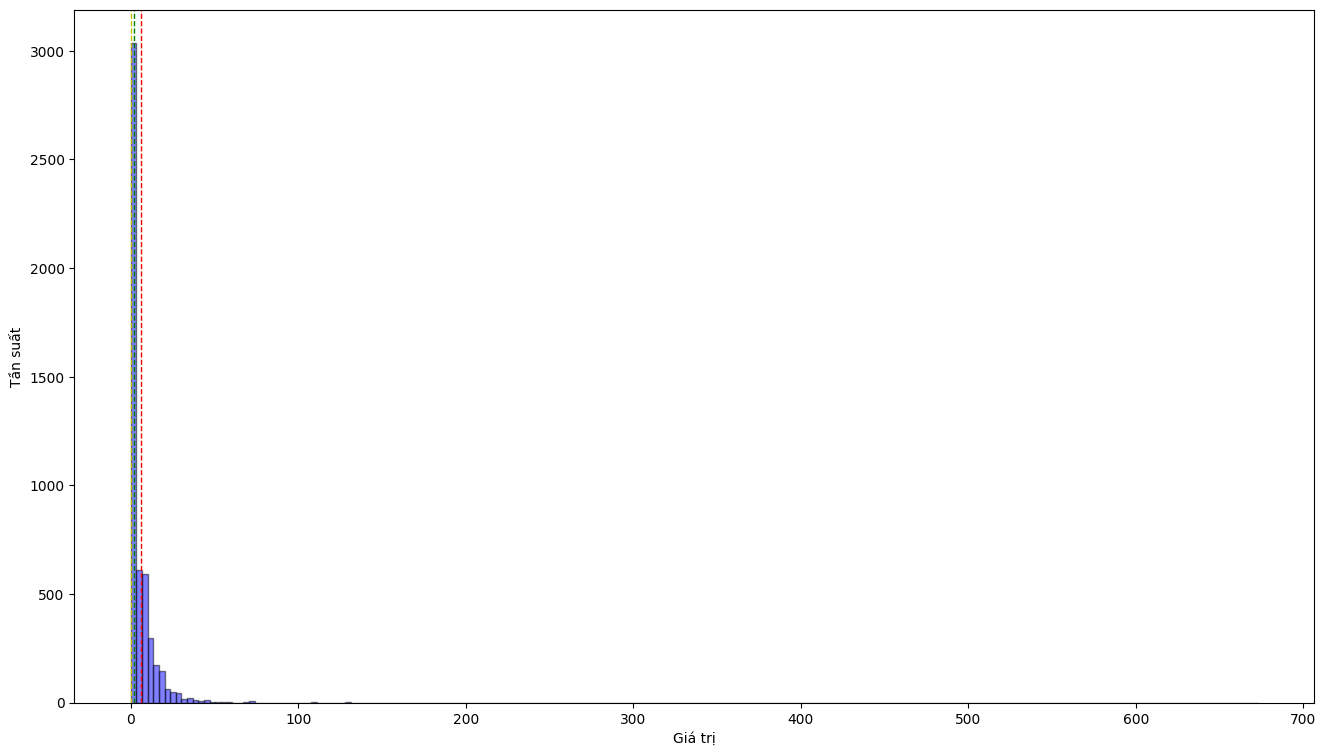

In [ ]:
calc_histplot(df['Discount_code_usage_count'])

In [ ]:
boxplot_num(df, 'Discount_code_usage_count')

* *Nhận xét:* Qua 2 biểu đồ ta thấy, biến 'Discount_code_usage_count' có chứa nhiều outlier values khiến cho hình dạng các biểu đồ không thể quan sát rõ. Ngoài ra các giá trị của biến gồm:
  - Mean (giá trị trung bình): 6.135266640716232
  - Median (giá trị trung vị): 2.0
  - Mode (Giá trị xuất hiện nhiều nhất): 0

Giá trị Max của biến thì lên tới con số 673, chênh lệch rất nhiều so với giá trị khoảng.
* Ở biểu đồ Boxplot có thể thấy, các điểm có giá trị trên 60 voucher rất ít

*Quan sát các giá trị ở 2 đầu biến

In [ ]:
DC = df['Discount_code_usage_count'].value_counts().reset_index().sort_values(by='index')
DC.columns = ['Value', 'Count']

In [ ]:
DC.head(20)

,Value,Count
0,0,1947
1,1,395
3,2,342
2,3,353
4,4,223
5,5,210
6,6,179
7,7,170
9,8,148
8,9,148


In [ ]:
DC.tail(50)

,Value,Count
40,38,4
32,39,6
63,40,1
44,41,3
38,42,4
52,43,2
43,44,3
46,45,2
37,46,5
49,47,2


* *Nhận xét:* Dễ thấy các giá trị lớn hơn 40 có rất ít giá trị. Nên chúng em sẽ chỉ loại bỏ các outlier ở mức quá cao này.

*Biến "Avg_Days_Between_Transactions"

Mean (giá trị trung bình): 86.09238273860666
Median (giá trị trung vị): 58.916666665
Mode (Giá trị xuất hiện nhiều nhất):
0    1.0
Name: Avg_Days_Between_Transactions, dtype: float64
Max (mode): 1056.5
Min (mode): 1.0


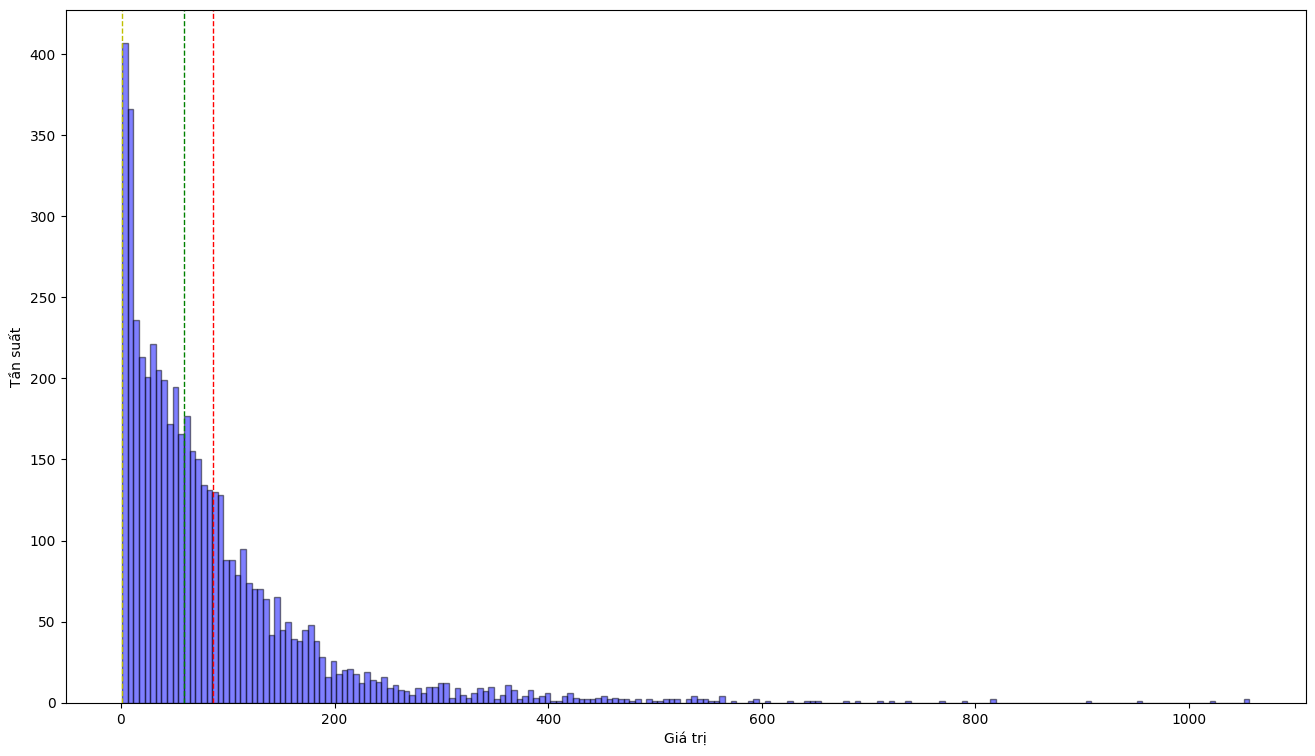

In [ ]:
calc_histplot(df['Avg_Days_Between_Transactions'])

In [ ]:
boxplot_num(df, 'Avg_Days_Between_Transactions')

* *Nhận xét:* Tương tự với các giá trị trên, qua 2 biểu đồ ta thấy, biến 'Avg_Days_Between_Transactions' có chứa nhiều outlier values ở mức giá trị quá cao so với phạm vi quan sát. Ngoài ra các giá trị của biến gồm:
  - Mean (giá trị trung bình): 86.09238273860666
  - Median (giá trị trung vị): 58.916666665
  - Mode (Giá trị xuất hiện nhiều nhất): 1.0

Giá trị Max của biến thì lên tới con số 1056.5, tức là đã gần 3 năm khách hàng mới quay trở lại mua hàng
* Ở biểu đồ Boxplot có thể thấy, các điểm có giá trị trên 560 ngày rất ít

*Quan sát các giá trị ở 2 đầu biến

In [ ]:
AD = df['Avg_Days_Between_Transactions'].value_counts().reset_index().sort_values(by='index')
AD.columns = ['Value', 'Count']

In [ ]:
AD.head(20)

,Value,Count
0,1.000000,61
1723,1.250000,1
140,1.333333,7
3,1.500000,33
126,1.666667,7
1132,1.750000,1
1499,1.833333,1
1965,1.920354,1
1,2.000000,36
490,2.250000,2


In [ ]:
AD.tail(50)

,Value,Count
1454,482.750000,1
2108,484.500000,1
1636,495.666667,1
772,496.750000,1
2038,502.000000,1
1367,503.333333,1
1974,508.500000,1
1338,512.750000,1
2101,514.000000,1
1656,515.000000,1


* *Nhận xét:* Ở biến này chúng em sẽ xử lý dựa trên khoảng áp dụng đối với các biến trước. Bởi vì target của chúng ta sẽ dự đoán khách hàng rời bỏ trong vòng 12 tháng. Việc khách hàng không có nhu cầu và thỉnh thoảng (khoảng vài năm mới mua 1 món hàng) và khách hàng vừa mua hàng được ghi nhận gần nhất trong khoảng thời gian hiện tại thì sẽ được đánh label tương ứng.

###Outliers Processing

* Sau phân tích, chúng em quyết định loại bỏ các outliers vượt mức phân vị 5%

In [ ]:
def clear_outlier(series, dataframe):
    s=series
    Q1=s.quantile(0.05)
    Q3=s.quantile(0.95)
    I = Q3-Q1
    Max = Q3 + 1.5*I
    Min = Q1 - 1.5*I
    temp = df[(s<Min)|(s>Max)]
    df_ = dataframe.copy()
    df_ = df_.drop(temp.index)
    return df_

In [ ]:
df = clear_outlier(df['Total_Lifetime_Spending'], df)
df = clear_outlier(df['Number_of_purchases'], df)
df = clear_outlier(df['Discount_code_usage_count'], df)
df = clear_outlier(df['Avg_Days_Between_Transactions'], df)

In [ ]:
df.shape

(5020, 14)

Sau xử lý, lượng sample của dataset giảm còn 5020 sample.

In [ ]:
df.to_csv('/content/Customer Churn_Processed.csv') #file để demo dashboard

##6.Exploratory Data Analysis – EDA

###Statistics - Categorical attribute

* Biến mục tiêu **"churn"**

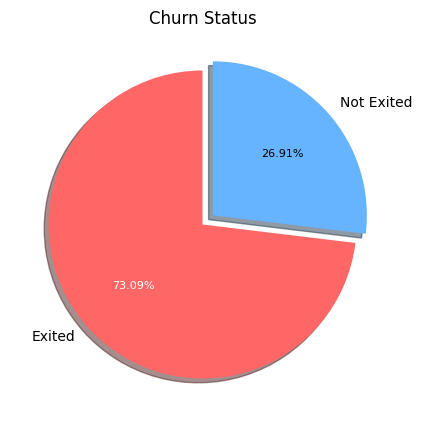

In [ ]:
values1 = df.churn.value_counts()
labels = ['Exited', 'Not Exited']
colors = ['#ff6666', '#66b3ff']

fig, ax = plt.subplots(figsize = (6, 5), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values1, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode, colors=colors)

plt.setp(texts, color = 'black')
plt.title('Churn Status')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

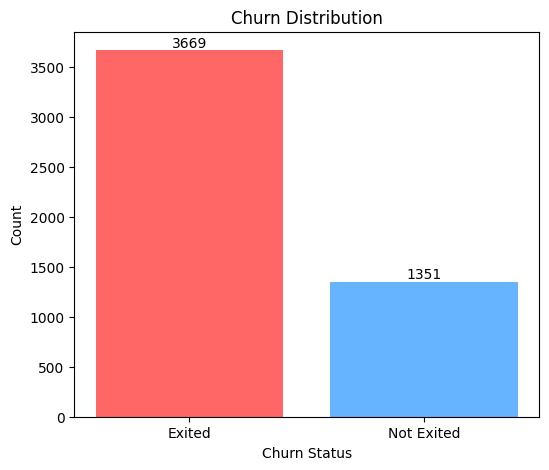

In [ ]:
values = df['churn'].value_counts()
labels = ['Exited', 'Not Exited']

fig, ax = plt.subplots(figsize=(6, 5), dpi=100)

bars = ax.bar(labels, values, color=['#ff6666', '#66b3ff'])

ax.set_ylabel('Count')
ax.set_xlabel('Churn Status')
ax.set_title('Churn Distribution')

# Add data values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

**Nhận xét:* Lượng khách hàng rời bỏ trong bộ dữ liệu (class **1** - Exited) nhiều hơn gấp 3 lần nhãn khách hàng tiếp tục mua hàng (class **0** - Not Exited)

→ Bộ dữ liệu mất cân bằng

* Biến **"Correct Category Member"**

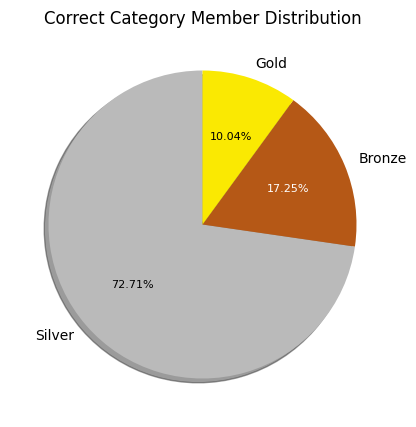

In [ ]:
values2 = df["Correct_Category_Member"].value_counts()

colors = ['#bababa','#b55816', '#fae902']

fig, ax = plt.subplots(figsize = (6, 5), dpi = 100)

patches, texts, autotexts = ax.pie(values2, labels = values2.index, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, colors=colors)

plt.setp(texts, color = 'black')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[0].set_color('black')
autotexts[2].set_color('black')
plt.title('Correct Category Member Distribution')
plt.show()

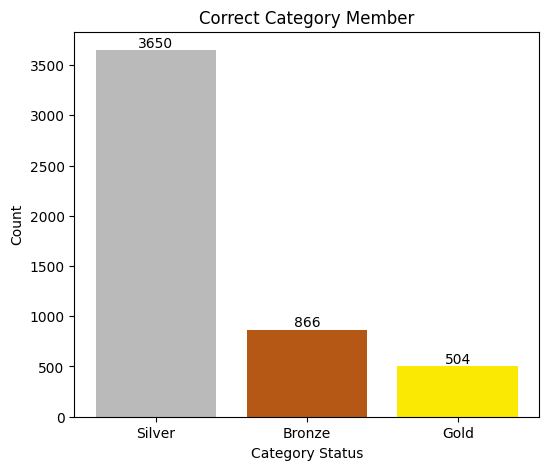

In [ ]:
values1 = df['Correct_Category_Member'].value_counts()
labels1 = values1.index

fig, ax = plt.subplots(figsize=(6, 5), dpi=100)

bars = ax.bar(labels1, values1, color=['#bababa', '#b55816', '#fae902'])

ax.set_ylabel('Count')
ax.set_xlabel('Category Status')
ax.set_title('Correct Category Member')

# Add data values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

**Nhận xét:*
  - Số lượng khách hàng đạt rank 'Silver' cao nhất trong bộ dữ liệu
  - Số lượng khách hàng đạt rank 'Bronze' và 'Gold' thì ít hơn, tổng số lượng của 2 rank này chỉ bằng 1/3 rank 'Silver'

* Biến **"Gender"**

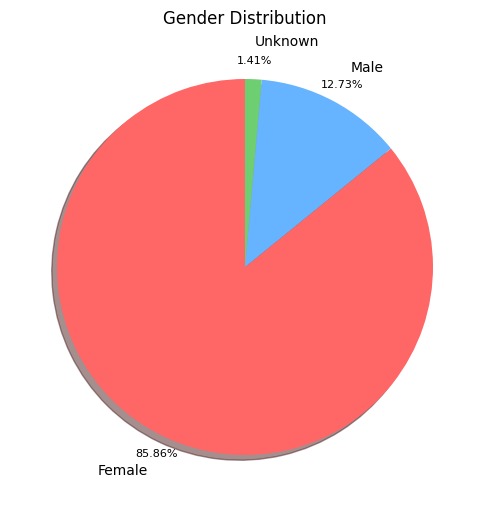

In [ ]:
values6 = df["Gender"].value_counts()

colors = ['#ff6666', '#66b3ff', '#6dcf71']

fig, ax = plt.subplots(figsize = (6, 5), dpi = 100)
label_distance = 1.2
pct_distance = 1.1
patches, texts, autotexts = ax.pie(values6, labels = values6.index, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, colors=colors, pctdistance=pct_distance, labeldistance=label_distance)

plt.tight_layout()

plt.setp(texts, color = 'black')
plt.setp(autotexts, size = 8, color = 'black')
plt.title('Gender Distribution')
plt.show()

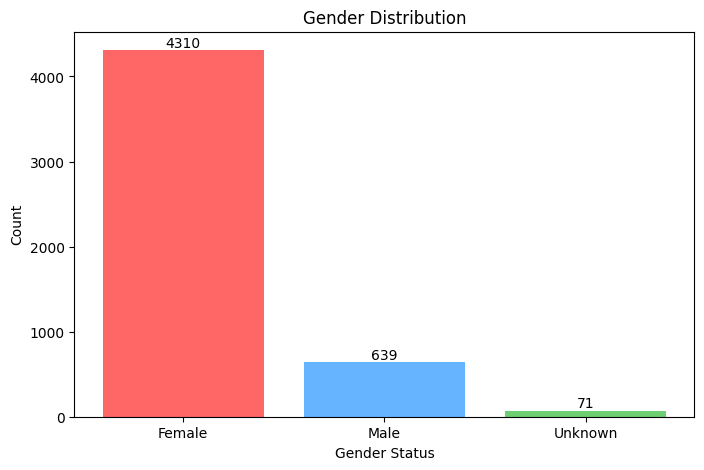

In [ ]:
values6 = df['Gender'].value_counts()
labels6 = values6.index

fig, ax = plt.subplots(figsize=(8, 5), dpi=100)

bars = ax.bar(labels6, values6, color=['#ff6666', '#66b3ff', '#6dcf71'])

ax.set_ylabel('Count')
ax.set_xlabel('Gender Status')
ax.set_title('Gender Distribution')

# Add data values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

**Nhận xét:* Vì đây là một công ty trang sức nên lượng khách hàng có giới tính là nữ ('Female') chiếm phần lớn trong bộ dữ liệu. Bên cạnh đó có một số ít khách hàng không cho biết thông tin này ('Unknown')

* Biến **"Age Group"**

In [ ]:
values7 = df["Age_Group"].value_counts()
values7

25-34 Years     2169
18-24 Years     1159
35-44 Years      973
Unknown          533
45-54 Years      171
More than 55      15
Name: Age_Group, dtype: int64

In [ ]:
x4 = np.char.array(['18-24 Years','25-34 Years','35-44 Years','45-54 Years','More than 55','Others'])
y4 = np.array([1159, 2169, 973, 171, 15, 533])
porcent4 = 100.*y4/y4.sum()

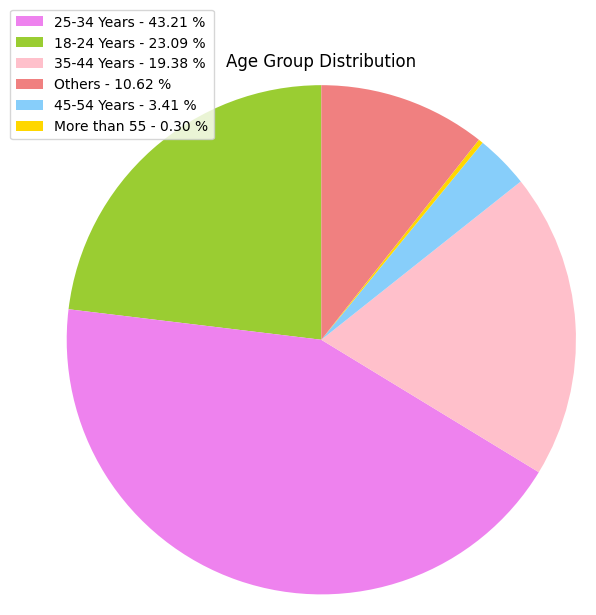

In [ ]:
colors = ['yellowgreen','violet','pink','lightskyblue','gold','lightcoral']

plt.figure(figsize=(6,8))

patches, texts = plt.pie(y4, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x4, porcent4)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y4),
                                          key=lambda x4: x4[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, 1.),
           fontsize=10)

plt.tight_layout()
plt.title('Age Group Distribution')
plt.show()

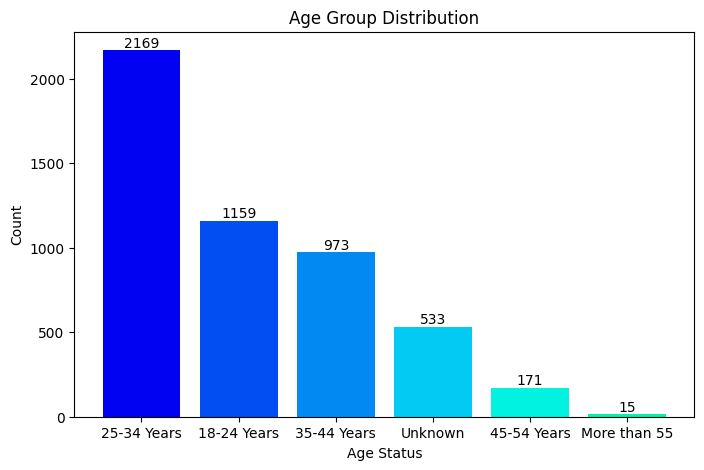

In [ ]:
values7 = df['Age_Group'].value_counts()
labels7 = values7.index

fig, ax = plt.subplots(figsize=(8, 5), dpi=100)

bars = ax.bar(labels7, values7, color=['#0202f2', '#024ef2', '#028af2', '#02caf2', '#02f2e2', '#02f2ae'])

ax.set_ylabel('Count')
ax.set_xlabel('Age Status')
ax.set_title('Age Group Distribution')

# Add data values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

**Nhận xét:* Gần một nửa lượng khách hàng thuộc nhóm 25-34 tuổi (*43.21%*), nhóm 18-24 và 35-44 tuổi cũng chiếm phần lớn. Có tới 10.62% lượng khách hàng không cho biết nhóm tuổi của họ. Khách hàng ở độ tuổi trung niên trở lên (trên 45 tuổi) chiếm thiểu số.

* Biến **"Store No."**

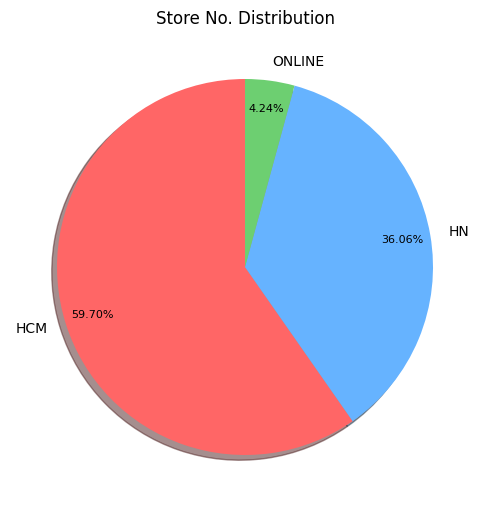

In [ ]:
values8 = df["Store_No."].value_counts()

colors = ['#ff6666', '#66b3ff', '#6dcf71']

fig, ax = plt.subplots(figsize = (6, 5), dpi = 100)
label_distance = 1.1
pct_distance = 0.85
patches, texts, autotexts = ax.pie(values8, labels = values8.index, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, colors=colors, pctdistance=pct_distance, labeldistance=label_distance)

plt.tight_layout()

plt.setp(texts, color = 'black')
plt.setp(autotexts, size = 8, color = 'black')
plt.title('Store No. Distribution')
plt.show()

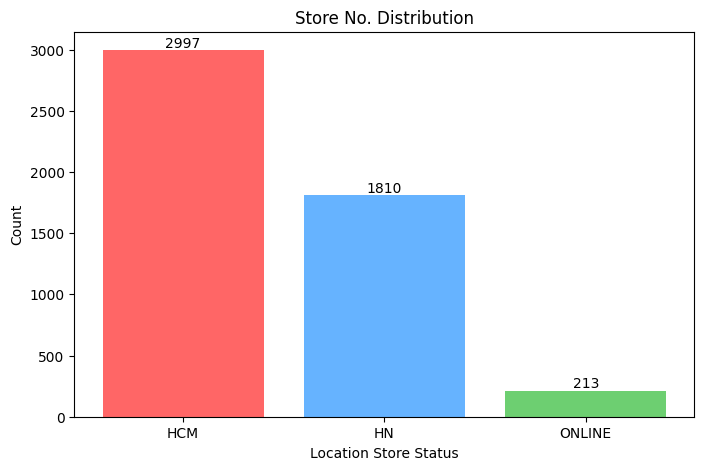

In [ ]:
values8 = df['Store_No.'].value_counts()
labels8 = values8.index

fig, ax = plt.subplots(figsize=(8, 5), dpi=100)

bars = ax.bar(labels8, values8, color=['#ff6666', '#66b3ff', '#6dcf71'])

ax.set_ylabel('Count')
ax.set_xlabel('Location Store Status')
ax.set_title('Store No. Distribution')

# Add data values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

**Nhận xét:* Lượng khách hàng ở Thành Phố Hồ Chí Minh ('HCM) cao vượt trội hơn so với ở Hà Nội ('HN'). Vì là mặt hàng trang sức nên không quá khó hiểu khi số lượng khách hàng mua hàng ONLINE chỉ chiếm thiểu số.

* Biến **"Purchase Type"**

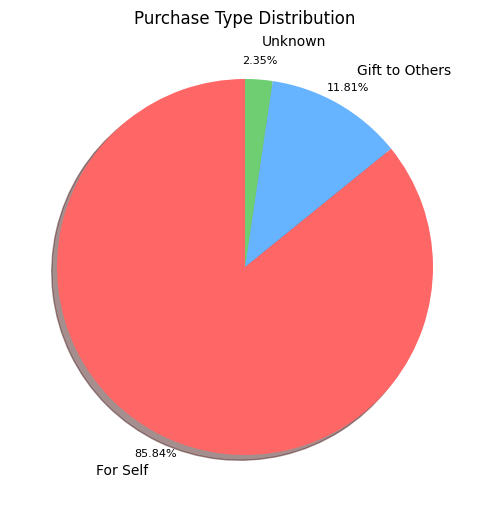

In [ ]:
values9 = df["Purchase_Type"].value_counts()

colors = ['#ff6666', '#66b3ff', '#6dcf71']

fig, ax = plt.subplots(figsize = (6, 5), dpi = 100)
label_distance = 1.2
pct_distance = 1.1
patches, texts, autotexts = ax.pie(values9, labels = values9.index, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, colors=colors, pctdistance=pct_distance, labeldistance=label_distance)

plt.tight_layout()

plt.setp(texts, color = 'black')
plt.setp(autotexts, size = 8, color = 'black')
plt.title('Purchase Type Distribution')
plt.show()

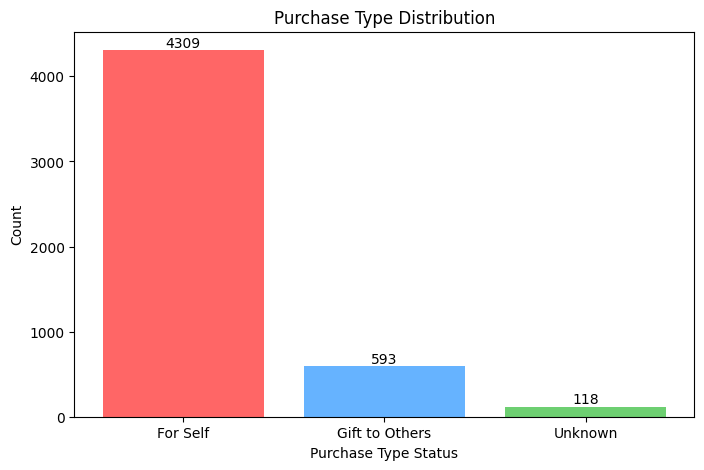

In [ ]:
values9 = df['Purchase_Type'].value_counts()
labels9 = values9.index

fig, ax = plt.subplots(figsize=(8, 5), dpi=100)

bars = ax.bar(labels9, values9, color=['#ff6666', '#66b3ff', '#6dcf71'])

ax.set_ylabel('Count')
ax.set_xlabel('Purchase Type Status')
ax.set_title('Purchase Type Distribution')

# Add data values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

**Nhận xét:* Hơn 85% lượng khách hàng cho biết họ mua trang sức cho bản thân ('For Self'), Số lượng khách hàng mua để làm quà tặng ('Gift to Others') chỉ chiếm hơn 11%. Một số ích khách hàng không cho biết mục đích của họ ('Unknown')

* Biến **"Customer Type"**

In [ ]:
values10 = df["Customer_Type"].value_counts()
values10

Individual    4802
Unknown        125
Company         93
Name: Customer_Type, dtype: int64

In [ ]:
x5 = np.char.array(['Individual','Company','Unknown'])
y5 = np.array([4802, 93, 125])
porcent5 = 100.*y5/y5.sum()

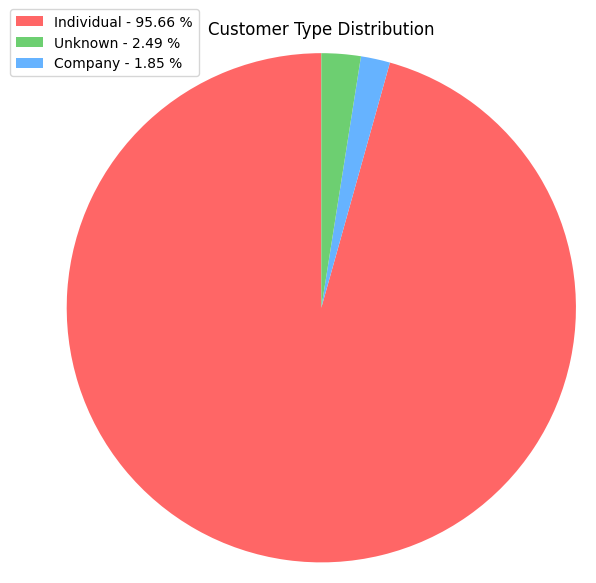

In [ ]:
colors = ['#ff6666', '#66b3ff', '#6dcf71']

plt.figure(figsize=(6,8))

patches, texts = plt.pie(y5, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x5, porcent5)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y5),
                                          key=lambda x5: x5[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, 1.),
           fontsize=10)

plt.tight_layout()
plt.title('Customer Type Distribution')
plt.show()

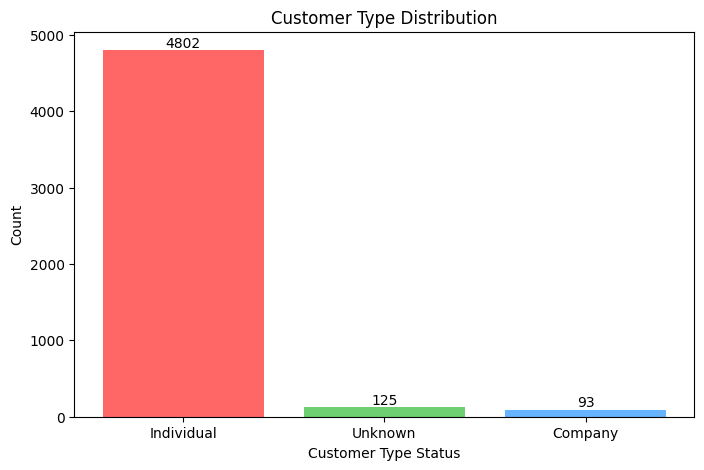

In [ ]:
values10 = df['Customer_Type'].value_counts()
labels10 = values10.index

fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
#color=['#0202f2', '#006fe6', '#02eef2', '#f0f0c9']
bars = ax.bar(labels10, values10, color=['#ff6666', '#6dcf71', '#66b3ff','#f803fc'])

ax.set_ylabel('Count')
ax.set_xlabel('Customer Type Status')
ax.set_title('Customer Type Distribution')

# Add data values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

**Nhận xét:* Khách hàng hầu hết (*hơn 95%*) là khách hàng cá nhân (*'individual'*), Khách hàng là doanh nghiệp (*'company'*) và không rõ (*'Unknown'*) chiếm tỉ lệ nhỏ.

### Statistics - Numerical attribute

In [ ]:
def calc_histplot(data):
    mean = data.mean()
    median = data.median()
    mode1 = data.mode().iloc[0]
    mode2 = data.mode()
    max = data.max()
    min = data.min()

    # Vẽ biểu đồ histogram
    plt.figure(figsize=(16,9))
    plt.hist(data, bins=200, alpha=0.5, color='b', edgecolor='k', label='Dữ liệu')
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(median, color='g', linestyle='dashed', linewidth=1, label='Median')
    plt.axvline(mode1, color='y', linestyle='dashed', linewidth=1, label='Mode')

    plt.xlabel('Giá trị')
    plt.ylabel('Tần suất')
    plt.show()
    print(f"Mean (giá trị trung bình): {mean}")
    print(f"Median (giá trị trung vị): {median}")
    print(f"Mode (Giá trị xuất hiện nhiều nhất):")
    print(mode2)
    print(f"Max (mode): {max}")
    print(f"Min (mode): {min}")

* Biến "Total Lifetime Spending"

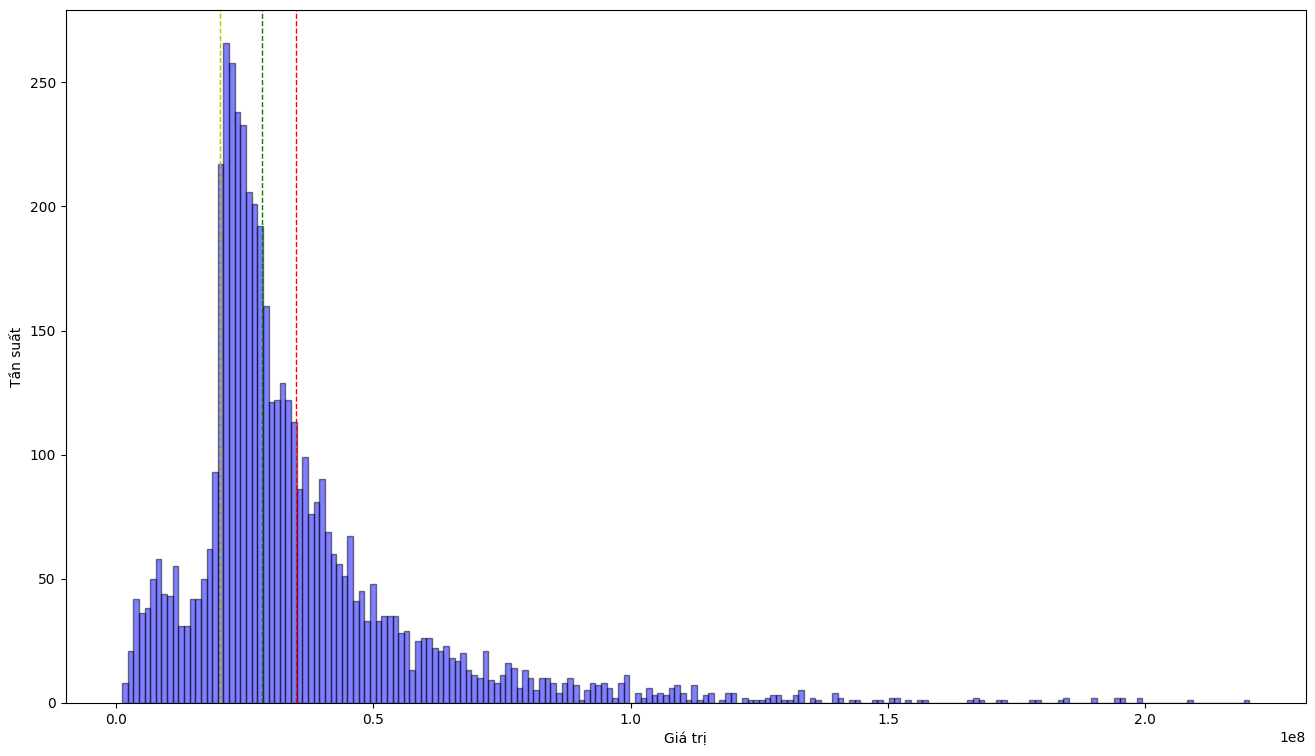

Mean (giá trị trung bình): 34989948.874501996
Median (giá trị trung vị): 28281000.0
Mode (Giá trị xuất hiện nhiều nhất):
0    20170000
1    20310000
2    20610000
Name: Total_Lifetime_Spending, dtype: int64
Max (mode): 220223000
Min (mode): 1153000


In [ ]:
calc_histplot(df['Total_Lifetime_Spending'])

* Biến **"Num of Win"**

In [ ]:
values3 = df["Num_of_Win"].value_counts()
values3

1    3778
0     687
2     493
3      52
4       6
5       4
Name: Num_of_Win, dtype: int64

In [ ]:
x1 = np.char.array(['0','1','2','3','4','5'])
y1 = np.array([687, 3778, 493, 52, 6, 4])
porcent1 = 100.*y1/y1.sum()

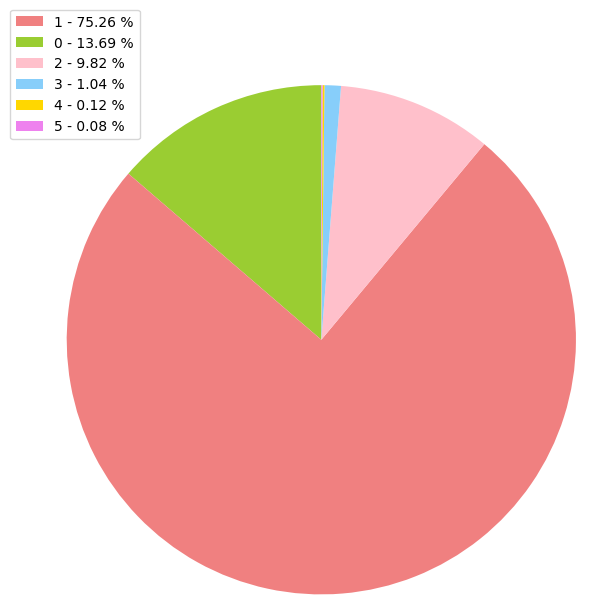

In [ ]:
colors = ['yellowgreen','lightcoral','pink','lightskyblue','gold','violet']

plt.figure(figsize=(6,8))

patches, texts = plt.pie(y1, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x1, porcent1)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y1),
                                          key=lambda x1: x1[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, 1.),
           fontsize=10)

plt.tight_layout()
plt.show()

- Khách hàng có tổng hóa đơn trên 20 triệu trong vòng 12 tháng sẽ được thăng lên hạng Silver
- Khách hàng có tổng hóa đơn trên 50 triệu trong vòng 12 tháng sẽ được thăng lên hạng Gold

**Nhận xét:* Biểu đồ cho thấy số lượng khách hàng được thăng hạng 1 lần chiếm tới 75.26%. Thăng hạng 2 lần chiếm tới 9.82%. Lượng khách hàng có hóa đơn dưới 20 triệu chiếm tới 13.69% và có hơn 1.24% lượng khách hàng có hơn 2 lần tăng hạng.

* Biến **"Num of Drop"**

In [ ]:
values4 = df["Num_of_Drop"].value_counts()
values4

0    4575
1     401
2      42
3       2
Name: Num_of_Drop, dtype: int64

In [ ]:
x2 = np.char.array(['0','1','2','3'])
y2 = np.array([4575, 401, 42, 2])
porcent2 = 100.*y2/y2.sum()

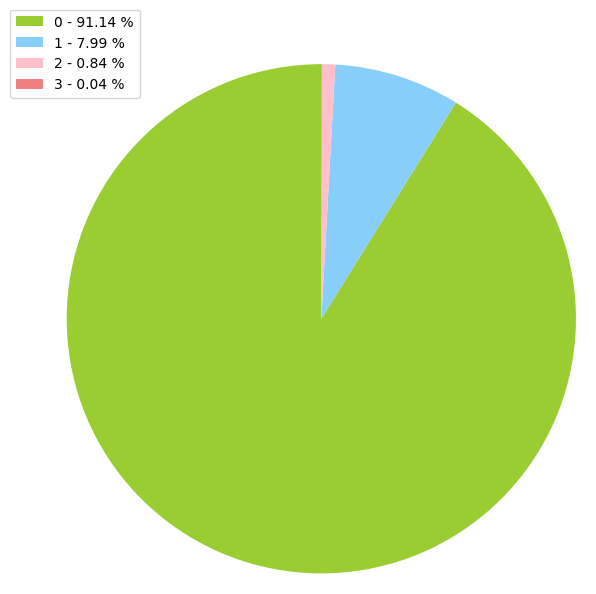

In [ ]:
colors = ['yellowgreen', 'lightskyblue','pink','lightcoral']

plt.figure(figsize=(6,8))

patches, texts = plt.pie(y2, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x2, porcent2)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y2),
                                          key=lambda x2: x2[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, 1.),
           fontsize=10)

plt.tight_layout()
plt.show()

- Tính từ lúc thăng hạng, trong vòng 12 tháng tiếp theo phải tích lũy đạt mức (cùng mức thăng hạng) để duy trì. Nếu không sẽ bị giảm hạng

**Nhận xét:* Có hơn 90% khách hàng chưa bị giảm hạng lần nào. Khoảng 8% lượng khách hạng bị giảm hạng 1 lần. Và có gần 1% lượng khách hàng bị giảm hạng từ 2 lần trở lên

* Biến **"Number of purchases"**

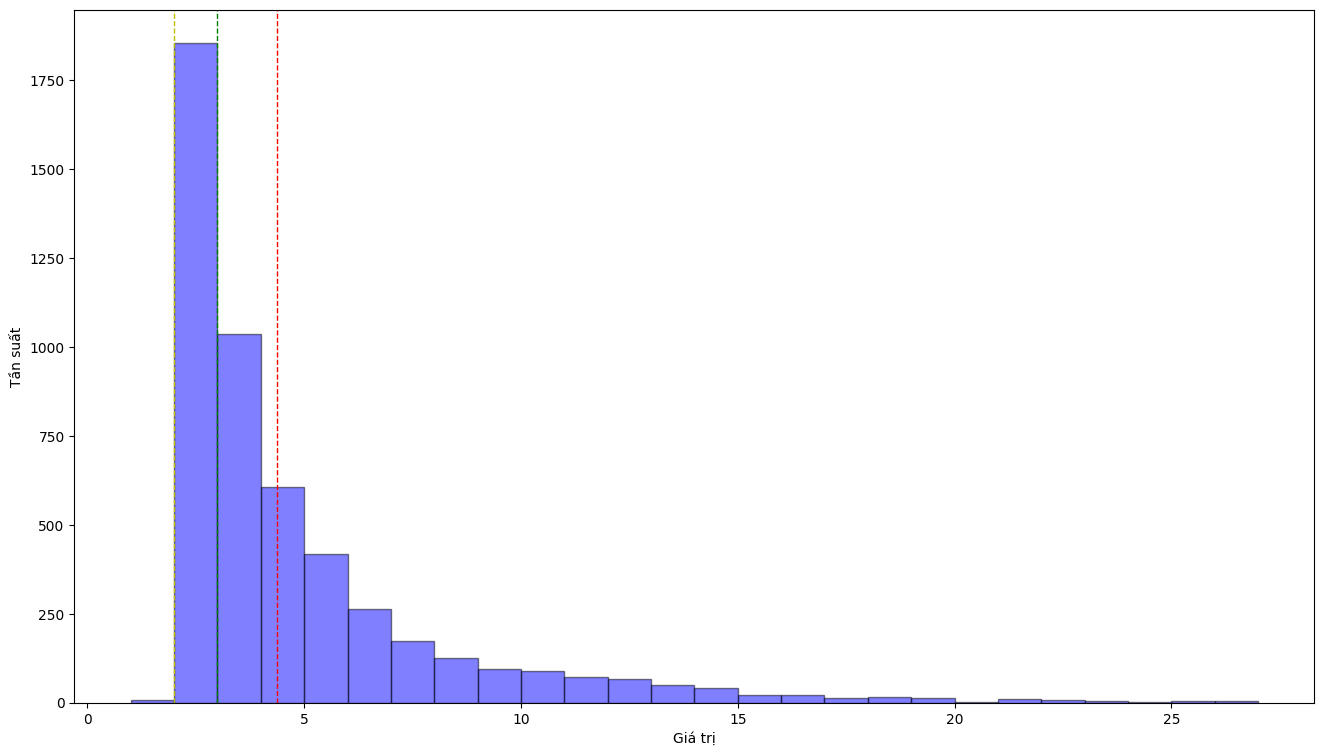

Mean (giá trị trung bình): 4.380079681274901
Median (giá trị trung vị): 3.0
Mode (Giá trị xuất hiện nhiều nhất):
0    2
Name: Number_of_purchases, dtype: int64
Max (mode): 27
Min (mode): 1


In [ ]:
data = df['Number_of_purchases']

mean = data.mean()
median = data.median()
mode1 = data.mode().iloc[0]
mode2 = data.mode()
max = data.max()
min = data.min()

    # Vẽ biểu đồ histogram
plt.figure(figsize=(16,9))
plt.hist(data, bins=26, alpha=0.5, color='b', edgecolor='k', label='Dữ liệu')
plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median, color='g', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(mode1, color='y', linestyle='dashed', linewidth=1, label='Mode')

plt.xlabel('Giá trị')
plt.ylabel('Tần suất')
plt.show()
print(f"Mean (giá trị trung bình): {mean}")
print(f"Median (giá trị trung vị): {median}")
print(f"Mode (Giá trị xuất hiện nhiều nhất):")
print(mode2)
print(f"Max (mode): {max}")
print(f"Min (mode): {min}")

* Biến **"Discount_code_usage_count"**

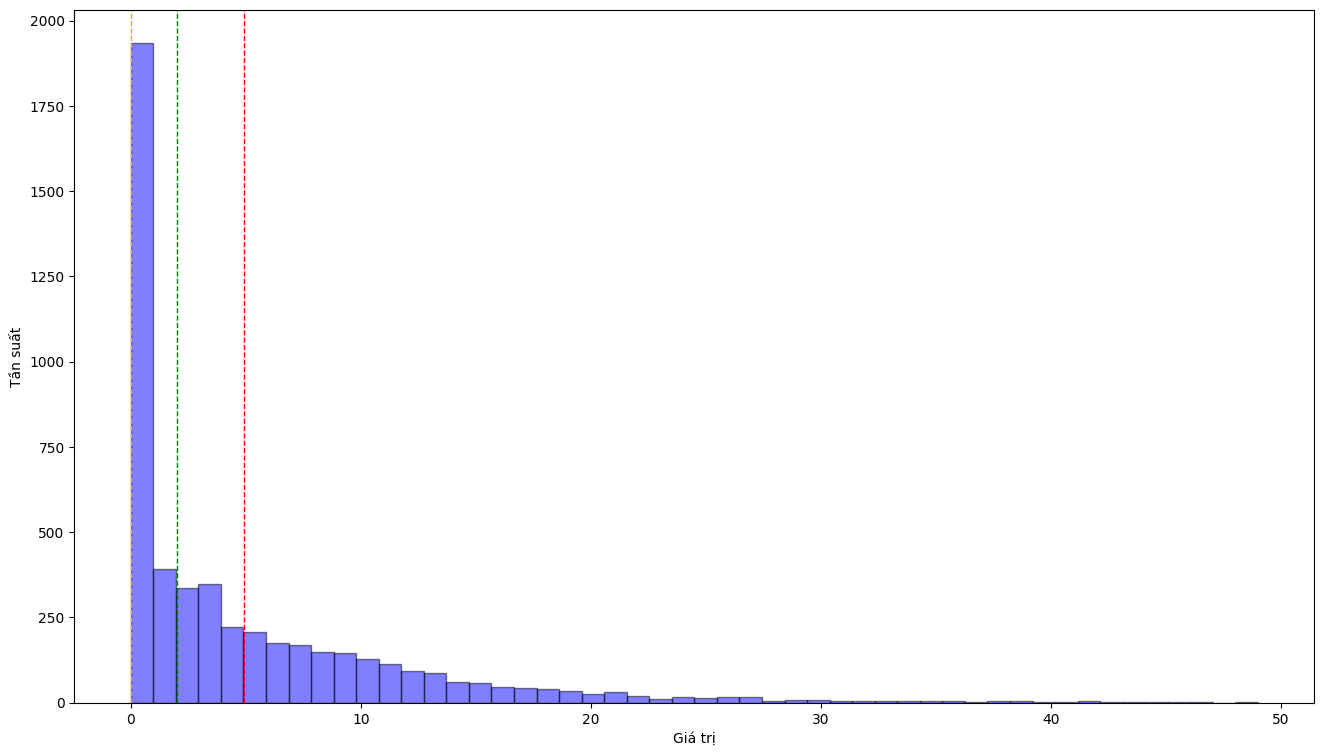

Mean (giá trị trung bình): 4.912948207171315
Median (giá trị trung vị): 2.0
Mode (Giá trị xuất hiện nhiều nhất):
0    0
Name: Discount_code_usage_count, dtype: int64
Max (mode): 49
Min (mode): 0


In [ ]:
data = df['Discount_code_usage_count']

mean = data.mean()
median = data.median()
mode1 = data.mode().iloc[0]
mode2 = data.mode()
max = data.max()
min = data.min()

    # Vẽ biểu đồ histogram
plt.figure(figsize=(16,9))
plt.hist(data, bins=50, alpha=0.5, color='b', edgecolor='k', label='Dữ liệu')
plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median, color='g', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(mode1, color='y', linestyle='dashed', linewidth=1, label='Mode')

plt.xlabel('Giá trị')
plt.ylabel('Tần suất')
plt.show()
print(f"Mean (giá trị trung bình): {mean}")
print(f"Median (giá trị trung vị): {median}")
print(f"Mode (Giá trị xuất hiện nhiều nhất):")
print(mode2)
print(f"Max (mode): {max}")
print(f"Min (mode): {min}")

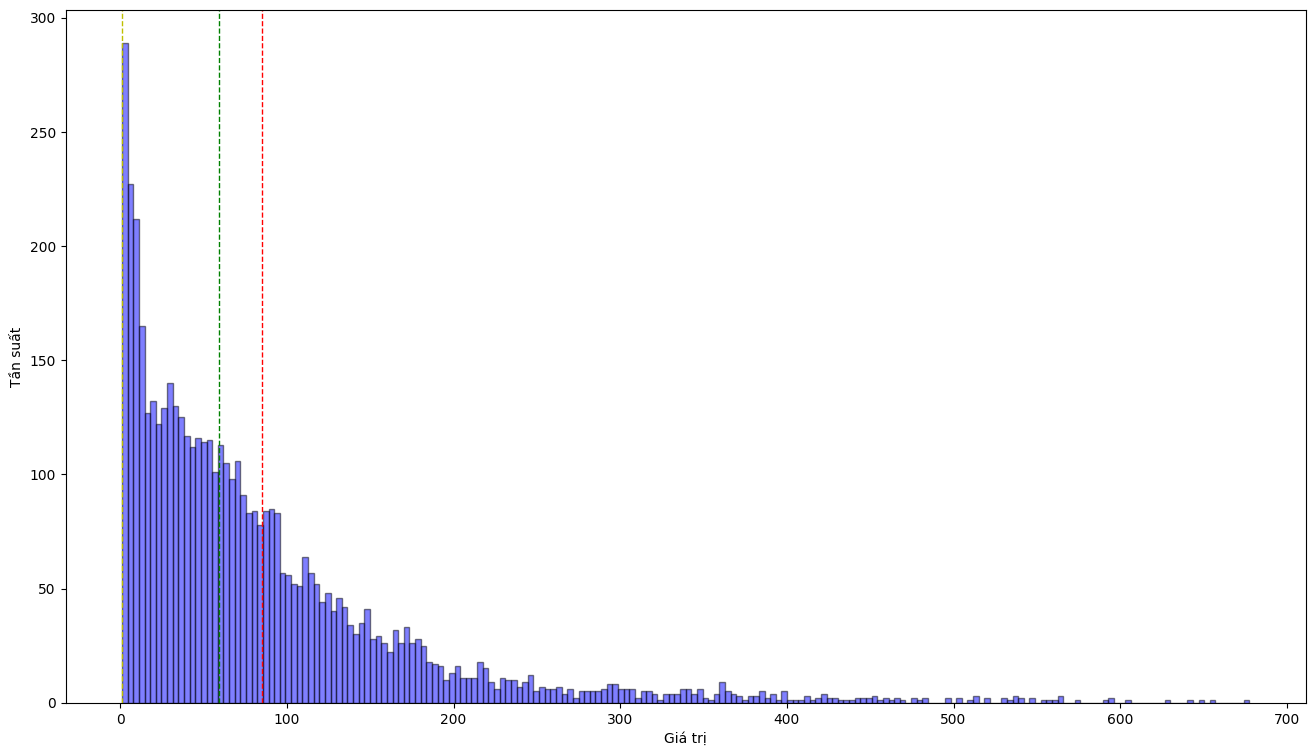

Mean (giá trị trung bình): 85.10478433959024
Median (giá trị trung vị): 59.5
Mode (Giá trị xuất hiện nhiều nhất):
0    1.0
Name: Avg_Days_Between_Transactions, dtype: float64
Max (mode): 677.5
Min (mode): 1.0


In [ ]:
calc_histplot(df['Avg_Days_Between_Transactions'])

###Statistics - Multi-attribute

* Churn vs Total_Lifetime_Spending

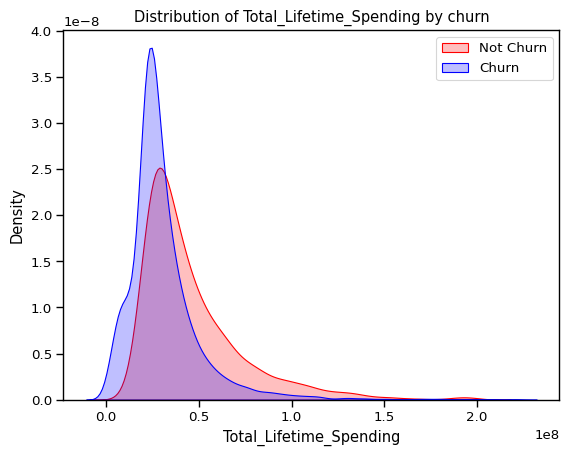

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.Total_Lifetime_Spending[(df["churn"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(df.Total_Lifetime_Spending[(df["churn"] == 1) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total_Lifetime_Spending');
ax.set_title('Distribution of Total_Lifetime_Spending by churn');

**Nhận xét:* - Có thể thấy khách hàng rời bỏ có tổng tiền mua hàng tập trung nhiều ở phạm vi 10 → 40 triệu. Khách hàng vẫn còn mua hàng thì tập trung ở phạm vi cao hơn, đồng thời phạm vi trên 50 triệu cao hơn gấp 2 lần so với lượng khách hàng rời bỏ.

In [ ]:
boxplot_num(df, 'Total_Lifetime_Spending')

**Nhận xét:*  Quan sát Boxplot ta có thể thấy hai hộp không quá chồng lấp nhau → có thể sẽ có ý nghĩa thống kê.

* Churn vs Correct_Category_Member

In [ ]:
fig = px.histogram(df, x="churn", color="Correct_Category_Member", title="<b>Customer Payment Method distribution w.r.t. Churn</b>",
                   color_discrete_map={"Bronze": "#b55816", "Silver": "#bababa", "Gold": "#fae902"})
fig.update_layout(width=500, height=500, bargap=0.1)
fig

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=["Bronze", "Silver", "Gold"], values=[176,1020,155], name="Churn: Not Exited"),
              1, 1)
fig.add_trace(go.Pie(labels=["Bronze", "Silver", "Gold"], values=[690,2630,349], name="Churn: Exited"),
              1, 2)

fig.update_traces(hole=0, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Correct Category Member and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn: Not Exited', x=0.165, y=-0.1, font_size=20, showarrow=False),
                 dict(text='Churn: Exited', x=0.83, y=-0.1, font_size=20, showarrow=False)],
    piecolorway = ['#bababa','#b55816', '#fae902'])
fig.show()

**Nhận xét:* Lượng khách hàng rời bỏ có mức rank 'Bronze' cao hơn khách hàng còn mua hàng. Ngược lại thì rank 'Gold' và 'Silver' thì thấp hơn. Điều này cho thấy khách hàng tiếp tục mua hàng (ngoại trừ những người mới mua 1 lần trong 12 tháng thống kê gần nhất) thì thường có mức cao hơn.

* Churn vs Num of Win

In [ ]:
fig = px.histogram(df, x="churn", color="Num_of_Win", barmode="group", title="<b>churn vs Num of Win</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Nhận xét:* Khách hàng rời bỏ chưa được nâng hạng lần nào có tỉ lệ cao vượt trội so với khách hàng còn mua hàng. Bên cạnh đó khách hàng còn mua hàng thì có số lần nâng hạng lớn hơn 2 cũng có số lượng thiểu số. Điều này cho thấy một số ít khách hàng có thể vì không có nhu cầu mua trang sức thường xuyên, hoặc là họ không tiếp tục mua hàng đạt mức để duy trì mức rank sẽ làm giảm rank của họ, và khi họ mua hàng lại và đạt mức thì họ lại được nâng rank.

* Churn vs Num of Drop

In [ ]:
fig = px.histogram(df, x="churn", color="Num_of_Drop", barmode="group", title="<b>churn vs Num of Drop</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Nhận xét:* Tương tự không quá ngạc nhiên khi số lần hạ rank từ 1 lần trở lên của khách hàng còn mua hàng có số lượng cao hơn khách hàng rời bỏ.

* Churn vs Number_of_purchases

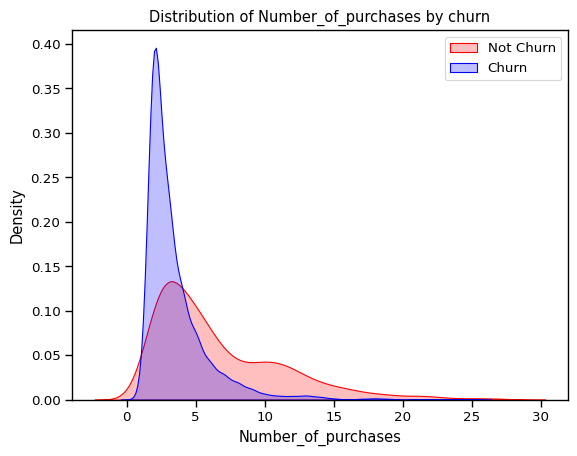

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.Number_of_purchases[(df["churn"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(df.Number_of_purchases[(df["churn"] == 1) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Number_of_purchases');
ax.set_title('Distribution of Number_of_purchases by churn');

In [ ]:
boxplot_num(df,'Number_of_purchases')

**Nhận xét:* Cùng tỉ lệ thuận với tổng số tiền mua hàng, về số lượng hàng đã mua (số lượng món trang sức) của khách hàng rời bỏ tập trung chủ yếu ở khoảng 2-4 món. Khách hàng còn mua hàng thì ở múc cao hơn (từ 3-5 món), đồng thời số lượng khách hàng còn mua hàng có tổng số món hàng đã mua từ 5 - 20 món cũng cao vượt trội hơn so với khách hàng rời bỏ. Nhìn vào Box Plot thì có thể thấy chiều dữ liệu của thuộc tính này tập trung nhiều ở mức thấp hơn trung bình ứng với mỗi class của biến churn.

* Churn vs Discount_code_usage_count

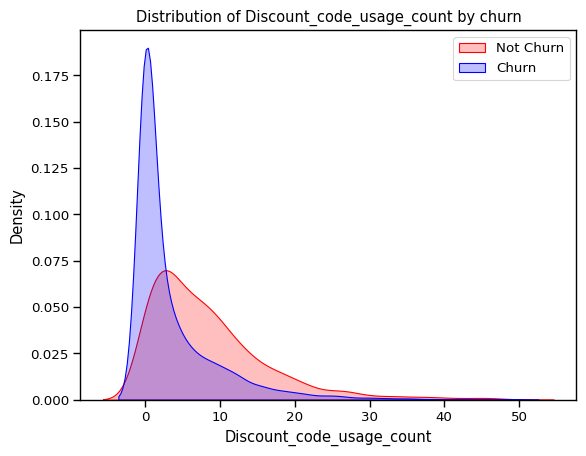

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.Discount_code_usage_count[(df["churn"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(df.Discount_code_usage_count[(df["churn"] == 1) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Discount_code_usage_count');
ax.set_title('Distribution of Discount_code_usage_count by churn');

In [ ]:
boxplot_num(df,'Discount_code_usage_count')

**Nhận xét:* Cũng như biến số lượng hàng đã mua ở trên, Số lượt sử dụng trương chình giảm giá của khách hàng rời bỏ phần lớn đều bằng 0. Khách hàng còn mua hàng thì thì số lượt sử dụng cao hơn hầu như gấp đôi khách hàng rời bỏ trong khoảng sử dụng từ 5 → 30 chương trình giảm giá.

* Churn vs Avg_Days_Between_Transactions

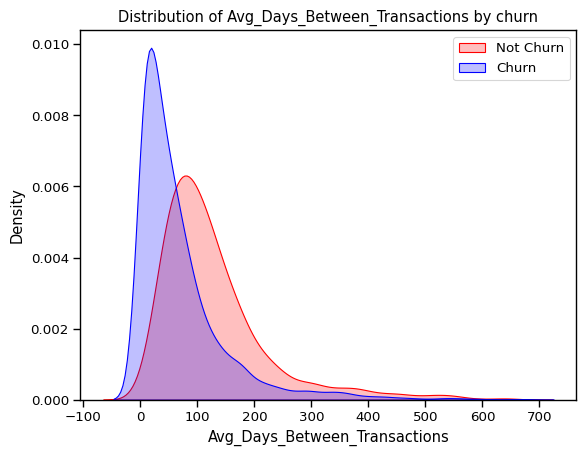

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.Avg_Days_Between_Transactions[(df["churn"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(df.Avg_Days_Between_Transactions[(df["churn"] == 1) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Avg_Days_Between_Transactions');
ax.set_title('Distribution of Avg_Days_Between_Transactions by churn');

In [ ]:
boxplot_num(df,'Avg_Days_Between_Transactions')

**Nhận xét:* Biểu đồ cho thấy khách hàng rời bỏ có trung bình ngày mua hàng tập trung nhiều trong khoảng một tháng, và cụ thể là 1.0. Điều này là do khách hàng rời bỏ họ đã chưa một lần nào quay lại để mua hàng, do đó không thể thống kê được trung bình số ngày khách hàng quay lại mua hàng, nên được gán giá trị 1.0. Ở khách hàng còn tiếp tục mua hàng thì tập trung nhiều từ 2 đến 5 tháng. Có một nhóm không nhỏ có khoảng thời gian từ 1 - 2 năm mới quay lại mua hàng.

* Churn vs Gender

In [ ]:
df["churn"][df["churn"]==0].groupby(by=df["Gender"]).count()

Gender
Female     1194
Male        149
Unknown       8
Name: churn, dtype: int64

In [ ]:
df["churn"][df["churn"]==1].groupby(by=df["Gender"]).count()

Gender
Female     3116
Male        490
Unknown      63
Name: churn, dtype: int64

In [ ]:
g_labels = ['Female', 'Male', 'Unknown']
c_labels = ['Exited', 'Not Exited']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['Gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['churn'].value_counts(), name="churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='churn', x=0.80, y=0.5, font_size=20, showarrow=False)])

fig.show()

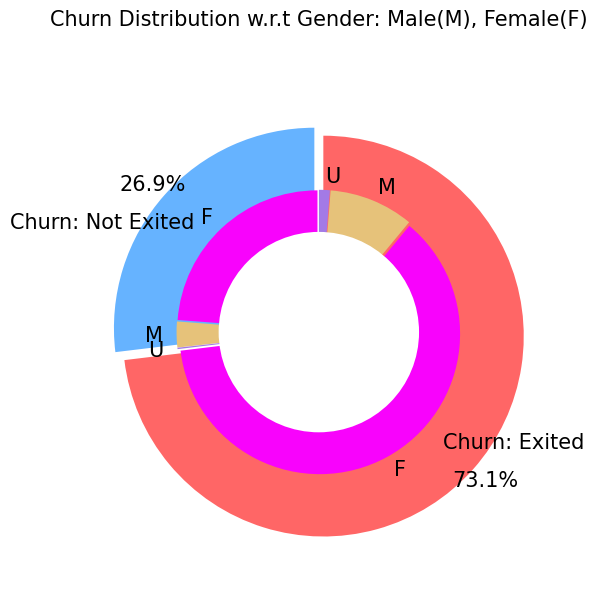

In [ ]:
plt.figure(figsize=(6, 6))
labels =["Churn: Not Exited","Churn: Exited"]
values = [1351,3669]
labels_gender = ["F","M","U", "F","M","U"]
sizes_gender = [1194, 149, 8, 3116, 490, 63]
colors = ['#66b3ff', '#ff6666']
colors_gender = ['#f803fc', '#e6c27a', '#a37ae6', '#f803fc', '#e6c27a','#a37ae6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

**Nhận xét:* Vì mặt hàng là đồ trang sức nên lượng khách hàng chủ yếu là nữ, và việc số lượng khách hàng nữ rời bỏ cũng sẽ là cao nhất. Tuy nhiên, lượng khách hàng không cho biết thông tin giới tính của mình có tỉ lệ rời bỏ cao hơn tỉ lệ còn tiếp tục mua hàng.

In [ ]:
fig = px.histogram(df, x="churn", color="Gender", barmode="group", title="<b>Gender distribution and Churn</b>")
fig.update_layout(width=600, height=500, bargap=0.1)
fig.show()

* Churn vs Age_Group

In [ ]:
fig = px.histogram(df, x="churn", color="Age_Group", barmode = "group", title="<b>Age_Group distribution and Churn</b>")
fig.update_layout(width=600, height=500, bargap=0.1)
fig.show()

**Nhận xét:* Tỉ lệ nhóm tuổi của mỗi class khá đồng đều. Tuy nhiên ta có thể thấy lượng khách hàng thuộc nhóm trên 55 tuổi và không cung cấp nhóm tuổi có tỉ lệ rời bỏ cao hơn.

* Churn vs Store_No.

In [ ]:
fig = px.histogram(df, x="churn", color="Store_No.", title="<b>Store_No. distribution and Churn</b>")
fig.update_layout(width=600, height=500, bargap=0.1)
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=["HN", "HCM", "ONLINE"], values=[561,746,44], name="Churn: Not Exited"),
              1, 1)
fig.add_trace(go.Pie(labels=["HN", "HCM", "ONLINE"], values=[1249,2251,349], name="Churn: Exited"),
              1, 2)

fig.update_traces(hole=0, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Store No. and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn: Not Exited', x=0.165, y=-0.1, font_size=20, showarrow=False),
                 dict(text='Churn: Exited', x=0.83, y=-0.1, font_size=20, showarrow=False)],
    piecolorway = ['#EF553B', '#636EFA','#00CC96'])
fig.show()

**Nhận xét:* Dễ thấy khách hàng mua Online và ở HCM có tỉ lệ rời bỏ cao hơn so với khách hàng còn tiếp tục mua hàng.

* Churn vs Purchase_Type

In [ ]:
fig = px.histogram(df, x="churn", color="Purchase_Type", title="<b>Purchase Type distribution and Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=["Gift", "Self", "Unknown"], values=[154,1184,13], name="Churn: Not Exited"),
              1, 1)
fig.add_trace(go.Pie(labels=["Gift", "Self", "Unknown"], values=[439,3125,105], name="Churn: Exited"),
              1, 2)

fig.update_traces(hole=0, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Purchase Type and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn: Not Exited', x=0.165, y=-0.1, font_size=20, showarrow=False),
                 dict(text='Churn: Exited', x=0.83, y=-0.1, font_size=20, showarrow=False)],
    piecolorway = ['#EF553B', '#636EFA','#00CC96'])
fig.show()

**Nhận xét:* Lượng khách mua hàng để làm quà tặng hoặc không cung cấp mục đích có tỉ lệ rời bỏ cao hơn so với khách hàng còn mua hàng

* Churn vs Customer_Type

In [ ]:
fig = px.histogram(df, x="churn", color="Customer_Type", barmode="group", title="<b>Customer Type distribution and Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Nhận xét:* Lượng khách là doanh nghiệp hoặc không rõ có tỉ lệ rời bỏ cao.

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=["Individual", "Company", "Unknown"], values=[1330,0,21], name="Churn: Not Exited"),
              1, 1)
fig.add_trace(go.Pie(labels=["Individual", "Company", "Unknown"], values=[3472,125,72], name="Churn: Exited"),
              1, 2)

fig.update_traces(hole=0, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Purchase Type and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn: Not Exited', x=0.165, y=-0.1, font_size=20, showarrow=False),
                 dict(text='Churn: Exited', x=0.83, y=-0.1, font_size=20, showarrow=False)],
    piecolorway = ['#EF553B', '#636EFA','#00CC96'])
fig.show()

In [ ]:
databox0 = df[df['churn'] ==0]
databox1 = df[df['churn'] ==1]

* Churn vs Total_Lifetime_Spending and Number_of_purchases

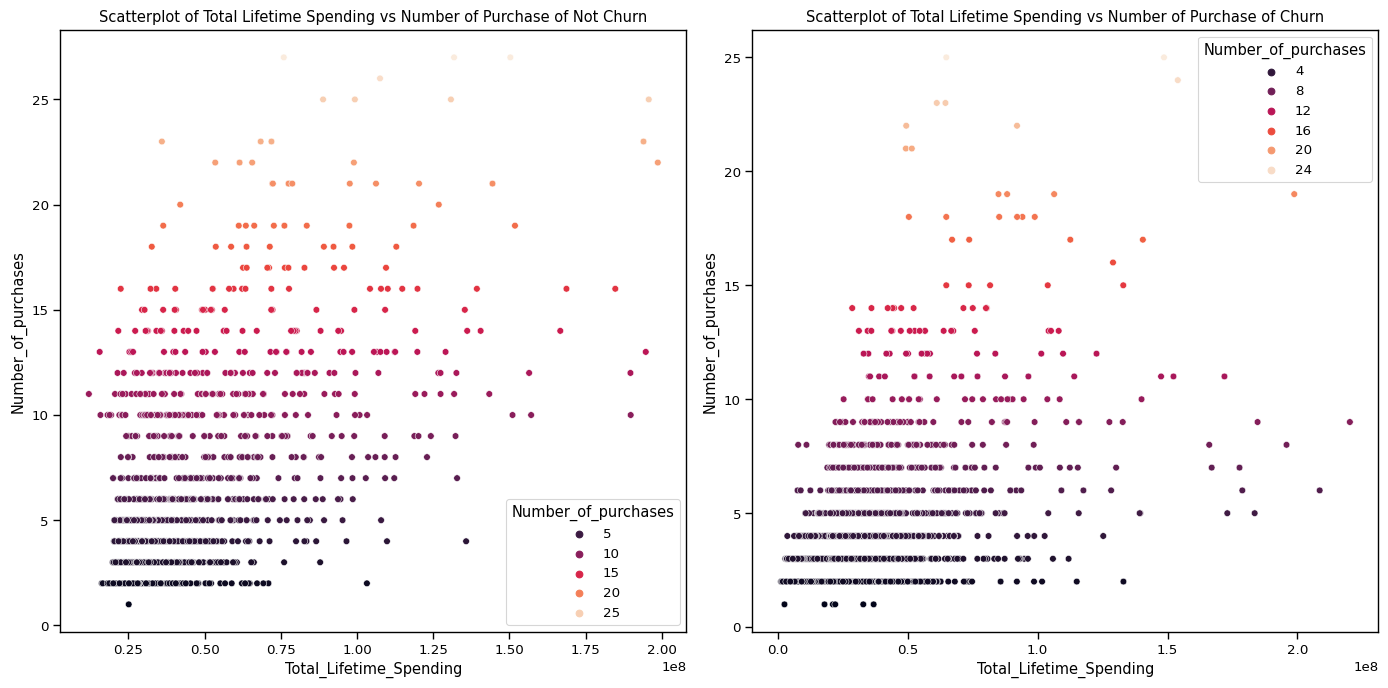

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

sns.scatterplot(data=databox0, x="Total_Lifetime_Spending", y="Number_of_purchases", hue="Number_of_purchases", palette='rocket', ax=axes[0])
axes[0].set_title('Scatterplot of Total Lifetime Spending vs Number of Purchase of Not Churn')

sns.scatterplot(data=databox1, x="Total_Lifetime_Spending", y="Number_of_purchases", hue="Number_of_purchases", palette='rocket', ax=axes[1])
axes[1].set_title('Scatterplot of Total Lifetime Spending vs Number of Purchase of Churn')

plt.tight_layout()

plt.show()

**Nhận xét:* Biểu đồ cho thấy ở cả 2 nhóm khách hàng mua số lượng hàng trong khoảng 0-10 món và có tổng tiền từ 25 đến 75 triệu có mật độ rất dày.

- Ở nhóm khách hàng còn mua hàng, các khách hàng đều mua từ 2 món trở lên và tổng tiền ít nhất cũng từ 10 triệu trở lên. Tuy nhiên biểu đồ phân tán còn cho thấy khách hàng mua hàng từ 10 món trở lên và có tổng tiền từ 125 triệu trở xuống rất cao. Ngoài ra cũng có một bộ phận khách hàng mua hàng càng nhiều thì tổng tiền cũng càng cao.

- Ở nhóm khách hàng rời bỏ, Cách khách hàng có tổng tiền ít nhất từ khoảng 1 triệu và có số lượng rất nhiều trong khoảng từ 1-10 món với khoảng tiền từ 1-75 triệu. Số lượng khách hàng mau từ 15 đến 25 món chỉ có tổng tiền trong khoảng từ 50 đến 125 triệu. Ngoài ra có xuất hiện các khách hàng mua trong khoảng 10 món nhưng lại có tổng tiền tới hơn 150 triệu.

* Churn vs Num of Win and Num of Drop

In [ ]:
grouped_df = df.groupby(['Num_of_Win', 'Num_of_Drop', 'churn']).size().reset_index(name='Count')

In [ ]:
grouped_df

,Num_of_Win,Num_of_Drop,churn,Count
0,0,0,0,71
1,0,0,1,615
2,0,1,1,1
3,1,0,0,926
4,1,0,1,2692
5,1,1,0,74
6,1,1,1,85
7,1,2,0,1
8,2,0,0,93
9,2,0,1,178


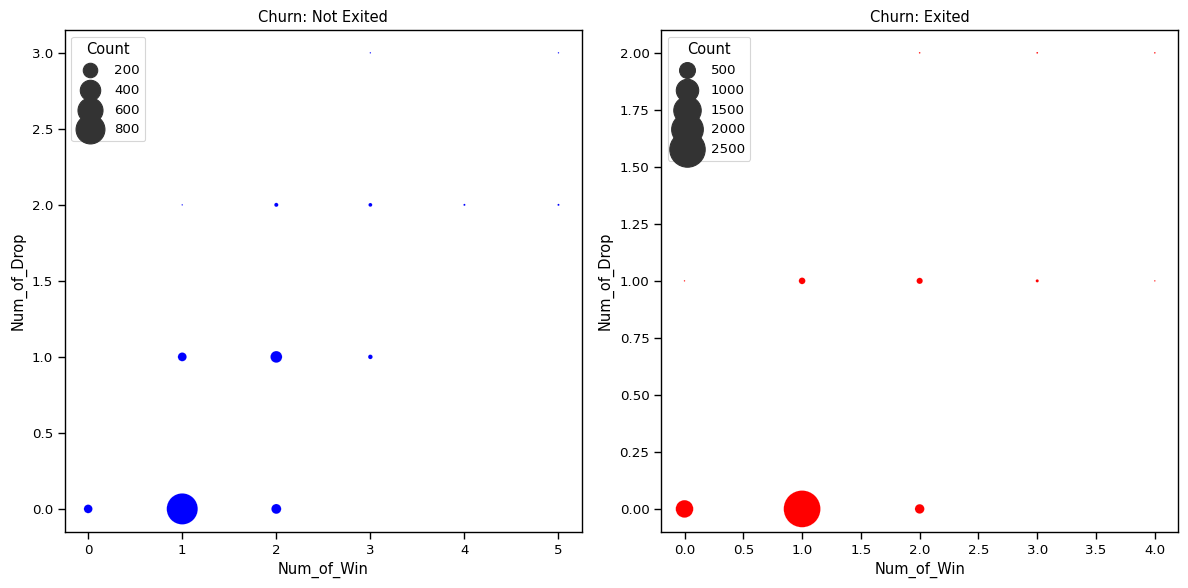

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(data=grouped_df[grouped_df['churn'] == 0], x="Num_of_Win", y="Num_of_Drop", color='blue', size="Count", sizes=(1, 500), ax=axes[0])
axes[0].set_title('Churn: Not Exited')

sns.scatterplot(data=grouped_df[grouped_df['churn'] == 1], x="Num_of_Win", y="Num_of_Drop", color='red', size="Count", sizes=(1, 700), ax=axes[1])
axes[1].set_title('Churn: Exited')

plt.tight_layout()

plt.show()

**Nhận xét:* Biểu đồ thể hiện mối quan hệ giữa việc tăng và giảm hạng so với churn. Xét theo độ to điểm dữ liệu của biểu đồ, các khách hàng được tăng hạng 1 lần và chưa bị giảm hạng là có tỉ lệ cao nhất. Khách hàng rời bỏ tập trung nhiều ở điểm thể hiện chưa tăng cũng như chưa giảm. Ngược lại khách hàng còn tiếp tục mua hàng tập trung nhiều ở các điểm tăng 2 - giảm 1, tăng 2 - giảm 0, tăng 1 giảm 1.

* Churn vs Gender and Store No.

In [ ]:
df["Gender"].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

In [ ]:
df["Store_No."].unique()

array(['HN', 'HCM', 'ONLINE'], dtype=object)

In [ ]:
df[df["Gender"]=="Male"][["Store_No.", "churn"]].value_counts()

Store_No.  churn
HCM        1        303
HN         1        158
HCM        0         75
HN         0         68
ONLINE     1         29
           0          6
dtype: int64

In [ ]:
df[df["Gender"]=="Female"][["Store_No.", "churn"]].value_counts()

Store_No.  churn
HCM        1        1902
HN         1        1074
HCM        0         666
HN         0         491
ONLINE     1         140
           0          37
dtype: int64

In [ ]:
df[df["Gender"]=="Others"][["Store_No.", "churn"]].value_counts()

Series([], dtype: int64)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes', 'Churn:Yes'],
       ["HCM", "HN", "ONLINE", "HCM", "HN", "ONLINE"]],
  y = [75, 68, 6, 303, 158, 29],
  name = 'Male',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes', 'Churn:Yes'],
       ["HCM", "HN", "ONLINE", "HCM", "HN", "ONLINE"]],
  y = [666, 491, 37, 1903, 1074, 140],
  name = 'Female',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes', 'Churn:Yes'],
       ["HCM", "HN", "ONLINE", "HCM", "HN", "ONLINE"]],
  y = [5, 2, 1, 46, 17, 0],
  name = 'Others',
))

fig.update_layout(title_text="<b>Churn Distribution vs Gender and Store No.</b>")

fig.show()


**Nhận xét:* Qua biểu đồ ta thấy được, khách hàng rời bỏ và không cho biết giới tính chiếm tỉ lệ cao hơn sao với khách hàng còn mua hàng, và có nhiều ở Tp.HCM và HN.

* Churn - Gender - Purchase Type

In [ ]:
df["Gender"].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

In [ ]:
df["Purchase_Type"].unique()

array(['Gift to Others', 'For Self', 'Unknown'], dtype=object)

In [ ]:
df[df["Gender"]=="Male"][["Purchase_Type", "churn"]].value_counts()

Purchase_Type   churn
Gift to Others  1        286
For Self        1        196
Gift to Others  0         93
For Self        0         53
Unknown         1          8
                0          3
dtype: int64

In [ ]:
df[df["Gender"]=="Female"][["Purchase_Type", "churn"]].value_counts()

Purchase_Type   churn
For Self        1        2890
                0        1125
Gift to Others  1         144
Unknown         1          82
Gift to Others  0          61
Unknown         0           8
dtype: int64

In [ ]:
df[df["Gender"]=="Unknown"][["Purchase_Type", "churn"]].value_counts()

Purchase_Type   churn
For Self        1        39
Unknown         1        15
Gift to Others  1         9
For Self        0         6
Unknown         0         2
dtype: int64

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes', 'Churn:Yes'],
       ["Gift to Others", "For Self", "Unknown", "Gift to Others", "For Self", "Unknown"]],
  y = [93, 53, 3, 286, 196, 8],
  name = 'Male',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes', 'Churn:Yes'],
       ["Gift to Others", "For Self", "Unknown", "Gift to Others", "For Self", "Unknown"]],
  y = [61, 1125, 8, 144, 2890, 82],
  name = 'Female',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes', 'Churn:Yes'],
       ["Gift to Others", "For Self", "Unknown", "Gift to Others", "For Self", "Unknown"]],
  y = [0, 6, 2, 9, 39, 15],
  name = 'Others',
))

fig.update_layout(title_text="<b>Churn Distribution vs Gender and Purchase_Type</b>")

fig.show()

**Nhận xét:* Ta thấy nữ mua trang sức để làm quà tặng rất ít, mua cho bản thân chiếm tỉ lệ cao. Bên cạnh đó, giới tính nam nhưng mua để làm quà hay mua cho bản thân có tỉ lệ rời bỏ cao vượt trội. Về các khách hàng không cung cấp thông tin giới tính, hầu hết đều thuộc nhóm rời bỏ.

* Churn-Customer_Type-Correct_rank

In [ ]:
df["Customer_Type"].unique()

array(['Individual', 'Unknown', 'Company'], dtype=object)

In [ ]:
df["Correct_Category_Member"].unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [ ]:
df[df["Correct_Category_Member"]=="Bronze"][["Customer_Type", "churn"]].value_counts()

Customer_Type  churn
Individual     1        678
               0        176
Company        1          8
Unknown        1          4
dtype: int64

In [ ]:
df[df["Correct_Category_Member"]=="Silver"][["Customer_Type", "churn"]].value_counts()

Customer_Type  churn
Individual     1        2481
               0        1002
Unknown        1          99
Company        1          50
               0          18
dtype: int64

In [ ]:
df[df["Correct_Category_Member"]=="Gold"][["Customer_Type", "churn"]].value_counts()

Customer_Type  churn
Individual     1        313
               0        152
Unknown        1         22
Company        1         14
               0          3
dtype: int64

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes', 'Churn:Yes'],
       ["Bronze", "Silver", "Gold", "Bronze", "Silver", "Gold"]],
  y = [176, 1002, 152, 678, 2481, 313],
  name = 'Individual',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes', 'Churn:Yes'],
       ["Bronze", "Silver", "Gold", "Bronze", "Silver", "Gold"]],
  y = [0, 18, 3, 8, 50, 14],
  name = 'Company',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes', 'Churn:Yes'],
       ["Bronze", "Silver", "Gold", "Bronze", "Silver", "Gold"]],
  y = [0, 0, 0, 4, 99, 22],
  name = 'Unknown',
))

fig.update_layout(title_text="<b>Churn Distribution vs Customer_Type and Correct_Category_Member</b>")

fig.show()

**Nhận xét:* Lượng khách hàng là doanh nghiệp hoặc không rõ thường thuộc mức rank silver và Gold và chiếm hầu hết ở nhóm rời bỏ.

* Churn vs Store No. and Total Lifetime Spending

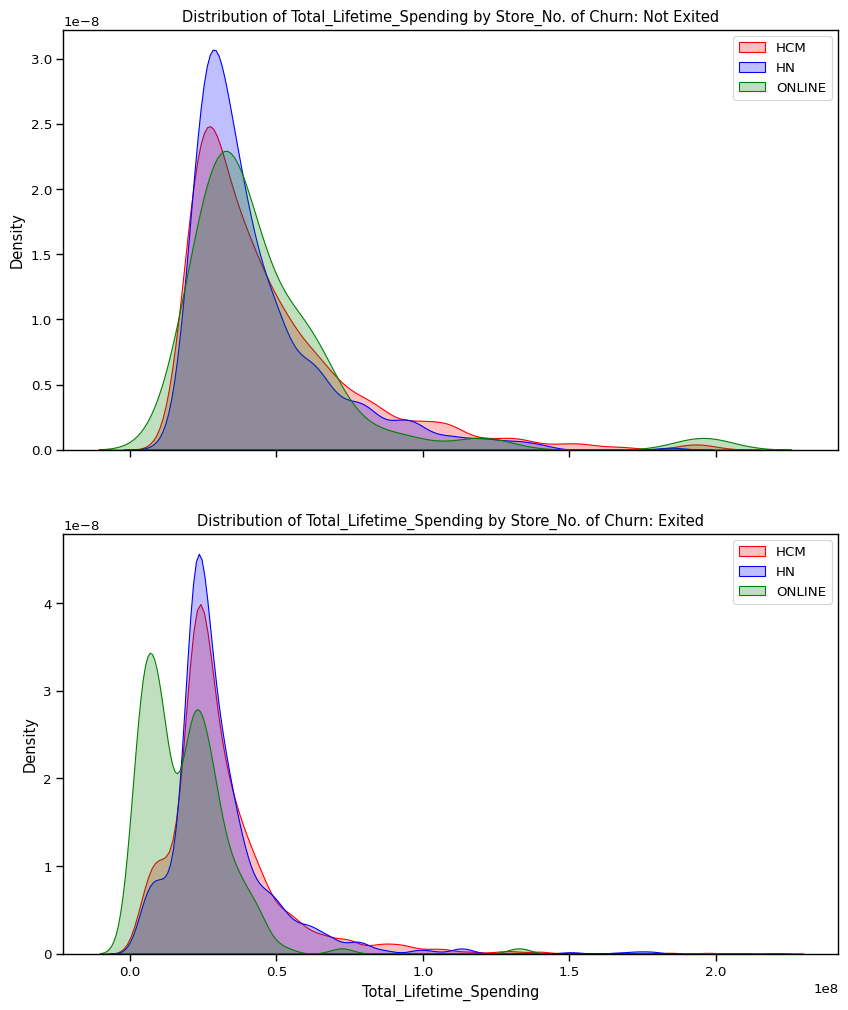

In [ ]:
sns.set_context("paper", font_scale=1.1)
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

sns.kdeplot(databox0.Total_Lifetime_Spending[(databox0["Store_No."] == "HCM")],
            color="Red", shade=True, ax=axes[0], bw_adjust=0.7)
sns.kdeplot(databox0.Total_Lifetime_Spending[(databox0["Store_No."] == "HN")],
            color="Blue", shade=True, ax=axes[0], bw_adjust=0.7)
sns.kdeplot(databox0.Total_Lifetime_Spending[(databox0["Store_No."] == "ONLINE")],
            color="Green", shade=True, ax=axes[0], bw_adjust=0.7)

axes[0].legend(["HCM", "HN", "ONLINE"], loc='upper right')
axes[0].set_ylabel('Density')
axes[0].set_xlabel('Total_Lifetime_Spending')
axes[0].set_title('Distribution of Total_Lifetime_Spending by Store_No. of Churn: Not Exited')

sns.kdeplot(databox1.Total_Lifetime_Spending[(databox1["Store_No."] == "HCM")],
            color="Red", shade=True, ax=axes[1], bw_adjust=0.7)
sns.kdeplot(databox1.Total_Lifetime_Spending[(databox1["Store_No."] == "HN")],
            color="Blue", shade=True, ax=axes[1], bw_adjust=0.7)
sns.kdeplot(databox1.Total_Lifetime_Spending[(databox1["Store_No."] == "ONLINE")],
            color="Green", shade=True, ax=axes[1], bw_adjust=0.7)

axes[1].legend(["HCM", "HN", "ONLINE"], loc='upper right')
axes[1].set_ylabel('Density')
axes[1].set_xlabel('Total_Lifetime_Spending')
axes[1].set_title('Distribution of Total_Lifetime_Spending by Store_No. of Churn: Exited')

plt.show()

**Nhận xét:* Ta thấy lượng khách hàng rời bỏ và mua hàng hình thức online tập trung nhiều ở khoảng giá tiền thấp khoảng 10 triệu. Ở cả 2 nhóm khách hàng, ở khu vực HN có số lượng cao nhất ở khoảng giá dưới 50 triệu. Riêng khách hàng ở HCM thì trong khoảng 50 triệu đến 100 triệu thì có số lượng nhỉnh hơn.

* Churn vs Customer_Type and Total Lifetime Spending

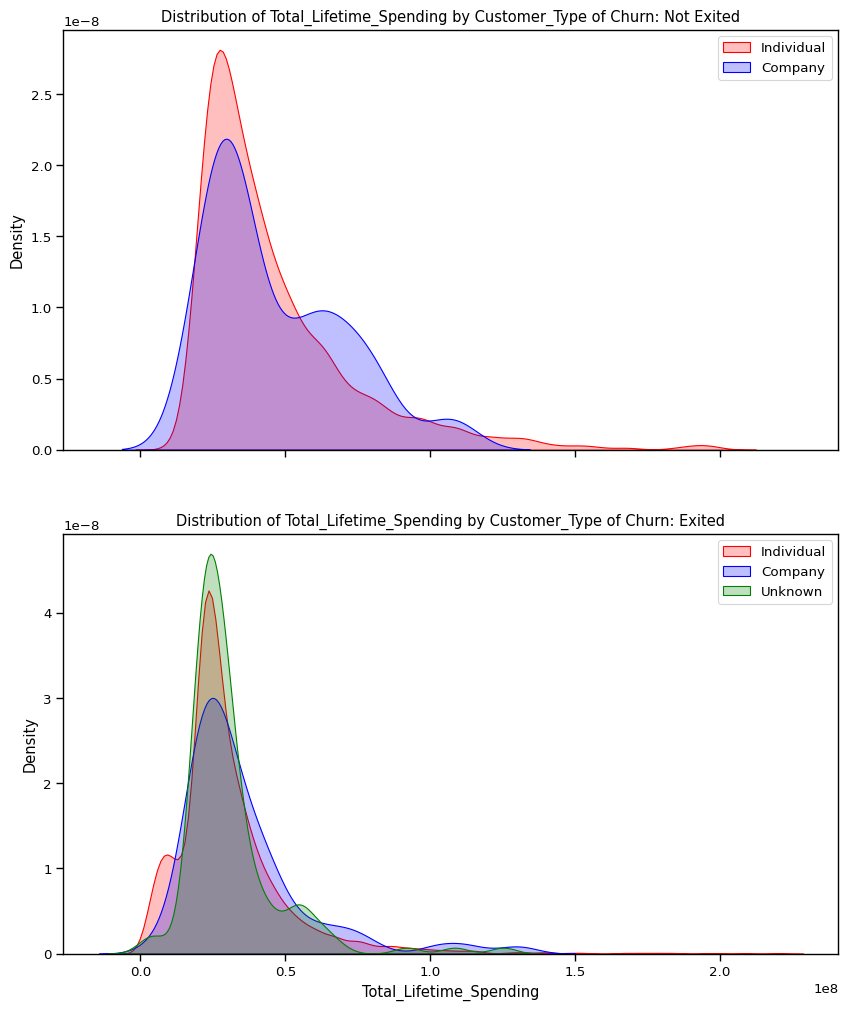

In [ ]:
sns.set_context("paper", font_scale=1.1)
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

sns.kdeplot(databox0.Total_Lifetime_Spending[(databox0["Customer_Type"] == "Individual")],
            color="Red", shade=True, ax=axes[0], bw_adjust=0.7)
sns.kdeplot(databox0.Total_Lifetime_Spending[(databox0["Customer_Type"] == "Company")],
            color="Blue", shade=True, ax=axes[0], bw_adjust=0.7)
sns.kdeplot(databox0.Total_Lifetime_Spending[(databox0["Customer_Type"] == "Unknown")],
            color="Green", shade=True, ax=axes[0], bw_adjust=0.7)

axes[0].legend(["Individual", "Company", "Unknown"], loc='upper right')
axes[0].set_ylabel('Density')
axes[0].set_xlabel('Total_Lifetime_Spending')
axes[0].set_title('Distribution of Total_Lifetime_Spending by Customer_Type of Churn: Not Exited')

sns.kdeplot(databox1.Total_Lifetime_Spending[(databox1["Customer_Type"] == "Individual")],
            color="Red", shade=True, ax=axes[1], bw_adjust=0.7)
sns.kdeplot(databox1.Total_Lifetime_Spending[(databox1["Customer_Type"] == "Company")],
            color="Blue", shade=True, ax=axes[1], bw_adjust=0.7)
sns.kdeplot(databox1.Total_Lifetime_Spending[(databox1["Customer_Type"] == "Unknown")],
            color="Green", shade=True, ax=axes[1], bw_adjust=0.7)

axes[1].legend(["Individual", "Company", "Unknown"], loc='upper right')
axes[1].set_ylabel('Density')
axes[1].set_xlabel('Total_Lifetime_Spending')
axes[1].set_title('Distribution of Total_Lifetime_Spending by Customer_Type of Churn: Exited')

plt.show()

**Nhận xét:*

- Ở nhóm khách hàng rời bỏ chứa toàn bộ lượng khách hàng không rõ thông tin của thuộc tính loại khách hàng. Giá trị tổng số tiền của nhóm này tập trung nhiều nhất ở khoảng 25 triệu trở xuống.
- Ở nhóm khách hàng còn lại, khách hàng cá tập trung nhiều ở khoảng tổng tiền ở khoảng hơn 25 triệu trở lên, riêng khách hàng là doanh nghiệp thì có một số tập trung ở khoảng tổng tiền cao hơn từ 50 triệu trở lên.

* Churn vs Purchase_Type and Avg_Days_Between_Transactions

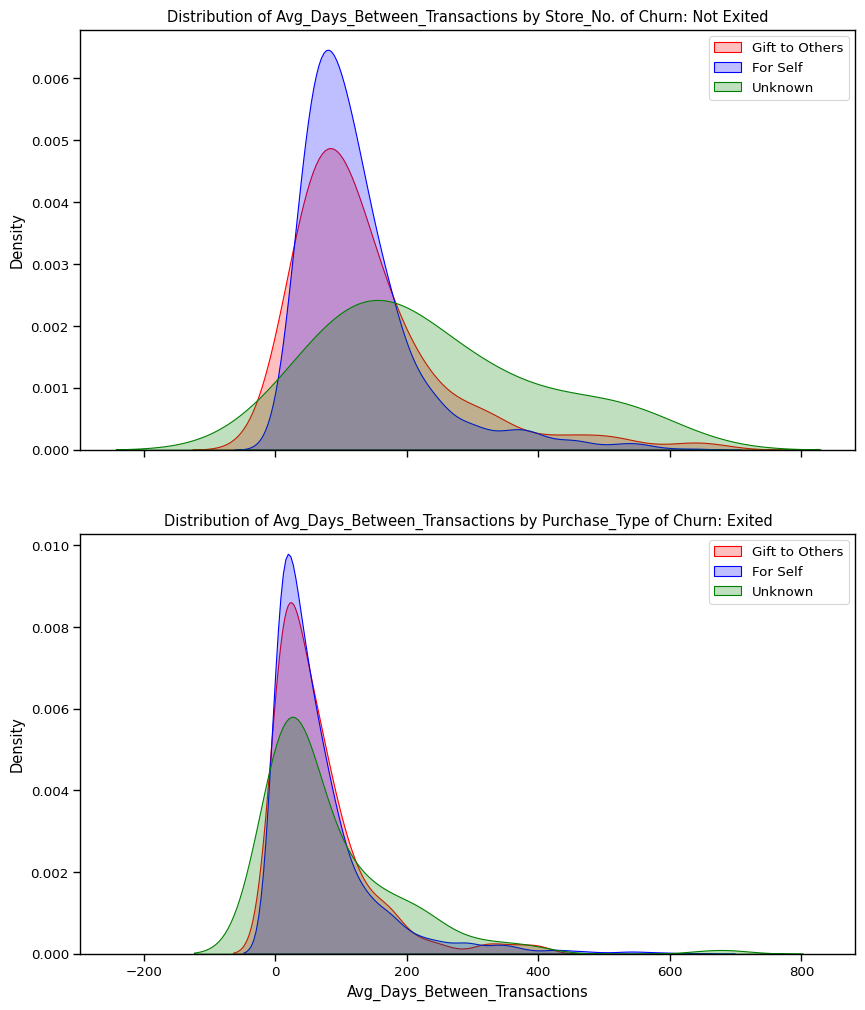

In [ ]:
sns.set_context("paper", font_scale=1.1)

fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

sns.kdeplot(databox0.Avg_Days_Between_Transactions[(databox0["Purchase_Type"] == "Gift to Others")],
            color="Red", shade=True, ax=axes[0],bw_adjust=1)
sns.kdeplot(databox0.Avg_Days_Between_Transactions[(databox0["Purchase_Type"] == "For Self")],
            color="Blue", shade=True, ax=axes[0],bw_adjust=1)
sns.kdeplot(databox0.Avg_Days_Between_Transactions[(databox0["Purchase_Type"] == "Unknown")],
            color="Green", shade=True, ax=axes[0],bw_adjust=1)
axes[0].legend(["Gift to Others", "For Self", "Unknown"], loc='upper right')
axes[0].set_ylabel('Density')
axes[0].set_xlabel('Avg_Days_Between_Transactions')
axes[0].set_title('Distribution of Avg_Days_Between_Transactions by Store_No. of Churn: Not Exited')

sns.kdeplot(databox1.Avg_Days_Between_Transactions[(databox1["Purchase_Type"] == "Gift to Others")],
            color="Red", shade=True, ax=axes[1],bw_adjust=1)
sns.kdeplot(databox1.Avg_Days_Between_Transactions[(databox1["Purchase_Type"] == "For Self")],
            color="Blue", shade=True, ax=axes[1],bw_adjust=1)
sns.kdeplot(databox1.Avg_Days_Between_Transactions[(databox1["Purchase_Type"] == "Unknown")],
            color="Green", shade=True, ax=axes[1],bw_adjust=1)
axes[1].legend(["Gift to Others", "For Self", "Unknown"], loc='upper right')
axes[1].set_ylabel('Density')
axes[1].set_xlabel('Avg_Days_Between_Transactions')
axes[1].set_title('Distribution of Avg_Days_Between_Transactions by Purchase_Type of Churn: Exited')

plt.show()

**Nhận xét:*

- Ở cả hai nhóm khách hàng, đối với mục đích mua hàng so với trung bình ngày mua hàng thì khá tương đồng nhau, mua với mục đích cho bản thân tập trung ở trung bình khoảng 2 tháng đổ lại. Riêng với các khách hàng không cung cấp mục đích thì có độ trải rộng hơn, đối với khách hàng còn mua hàng thậm chí lên tới 2 năm.

* Churn vs Num of purchases and purchase_Type

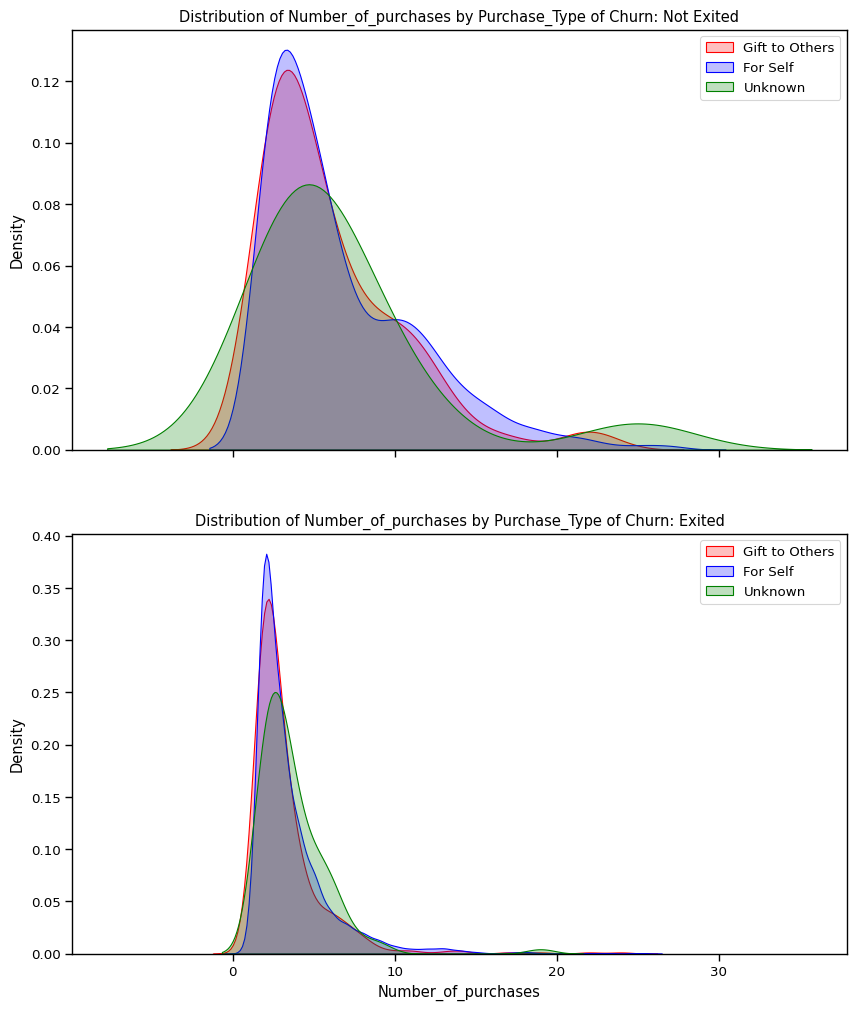

In [ ]:
sns.set_context("paper", font_scale=1.1)

fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

sns.kdeplot(databox0.Number_of_purchases[(databox0["Purchase_Type"] == "Gift to Others")],
                color="Red", shade = True, ax=axes[0])
sns.kdeplot(databox0.Number_of_purchases[(databox0["Purchase_Type"] == "For Self")],
                color="Blue", shade= True, ax=axes[0])
sns.kdeplot(databox0.Number_of_purchases[(databox0["Purchase_Type"] == "Unknown")],
                color="Green", shade= True, ax=axes[0])
axes[0].legend(["Gift to Others","For Self", "Unknown"],loc='upper right')
axes[0].set_ylabel('Density')
axes[0].set_xlabel('Number_of_purchases')
axes[0].set_title('Distribution of Number_of_purchases by Purchase_Type of Churn: Not Exited')

ax = sns.kdeplot(databox1.Number_of_purchases[(databox1["Purchase_Type"] == "Gift to Others")],
                color="Red", shade = True, ax=axes[1])
ax = sns.kdeplot(databox1.Number_of_purchases[(databox1["Purchase_Type"] == "For Self")],
                color="Blue", shade= True, ax=axes[1])
ax = sns.kdeplot(databox1.Number_of_purchases[(databox1["Purchase_Type"] == "Unknown")],
                color="Green", shade= True, ax=axes[1])
axes[1].legend(["Gift to Others","For Self", "Unknown"],loc='upper right')
axes[1].set_ylabel('Density')
axes[1].set_xlabel('Number_of_purchases')
axes[1].set_title('Distribution of Number_of_purchases by Purchase_Type of Churn: Exited')

plt.show()

**Nhận xét:*

- Ở nhóm khách hàng rời bỏ, ứng với mỗi mục đích đều có số lượng hàng đã mua tương đối tập trung ở khoảng nhỏ hơn 10 món. Riêng những khách hàng không rõ mục đích thì có một khoảng nhỉnh hơn từ 5 món trở lên.
- Ở nhóm khách hàng tiếp tục mua hàng thì khách hàng rõ mục đích mức cao ở khoảng 5 món. Một lượng khách hàng không nhỏ tập trung ở 10 món trở lên. Riêng nhóm khách hàng không rõ mục đích thì có một nhóm ở khoảng từ 30 món trở lên.

* Churn vs Discount and Purchase Type

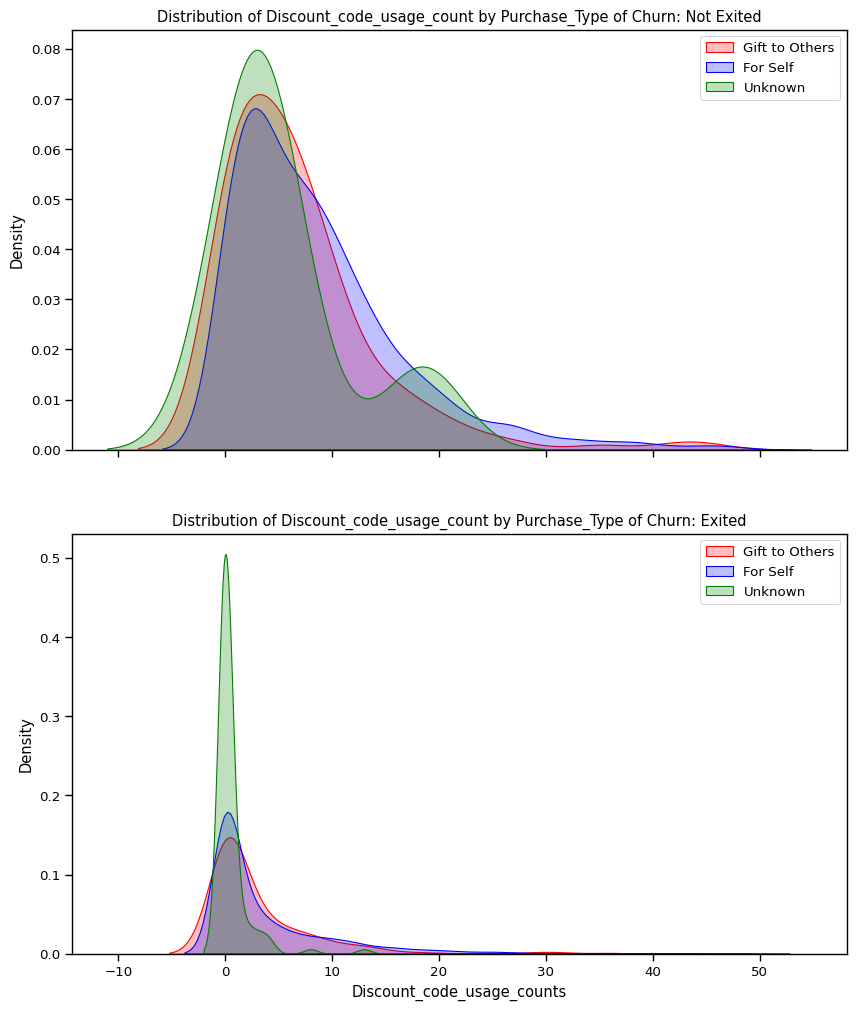

In [ ]:
sns.set_context("paper", font_scale=1.1)

fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

sns.kdeplot(databox0.Discount_code_usage_count[(databox0["Purchase_Type"] == "Gift to Others")],
                color="Red", shade = True, ax=axes[0])
sns.kdeplot(databox0.Discount_code_usage_count[(databox0["Purchase_Type"] == "For Self")],
                color="Blue", shade= True, ax=axes[0])
sns.kdeplot(databox0.Discount_code_usage_count[(databox0["Purchase_Type"] == "Unknown")],
                color="Green", shade= True, ax=axes[0])
axes[0].legend(["Gift to Others","For Self", "Unknown"],loc='upper right')
axes[0].set_ylabel('Density')
axes[0].set_xlabel('Discount_code_usage_count')
axes[0].set_title('Distribution of Discount_code_usage_count by Purchase_Type of Churn: Not Exited')

ax = sns.kdeplot(databox1.Discount_code_usage_count[(databox1["Purchase_Type"] == "Gift to Others")],
                color="Red", shade = True, ax=axes[1])
ax = sns.kdeplot(databox1.Discount_code_usage_count[(databox1["Purchase_Type"] == "For Self")],
                color="Blue", shade= True, ax=axes[1])
ax = sns.kdeplot(databox1.Discount_code_usage_count[(databox1["Purchase_Type"] == "Unknown")],
                color="Green", shade= True, ax=axes[1])
axes[1].legend(["Gift to Others","For Self", "Unknown"],loc='upper right')
axes[1].set_ylabel('Density')
axes[1].set_xlabel('Discount_code_usage_counts')
axes[1].set_title('Distribution of Discount_code_usage_count by Purchase_Type of Churn: Exited')

plt.show()

**Nhận xét:*

- Ở nhóm khách hàng rời bỏ, những khách hàng không rõ mục đích ở khoảng 0 có số lượng rất nhiều, tức chưa sử dụng chương trình giảm giá lần nào. Các khách hàng có mục đích thì ở khoảng có sử dụng từ 1 đến 10 chương trình giảm giá.
- Ở nhóm khách hàng tiếp tục mua hàng thì số lượt sử dụng chương trình giá cao vượt trội hơn so với khách hàng rời bỏ. Khách hàng có lượt sử dụng từ 1-10 và từ 15-25 chương trình giảm giá lại là các khách hàng không cung cấp mục đích Riêng các khách hàng sử dụng từ 10 đến 30 chương trình thì với mục đích mua cho bản thân vượt trội hơn

##7.Model

###Correlation

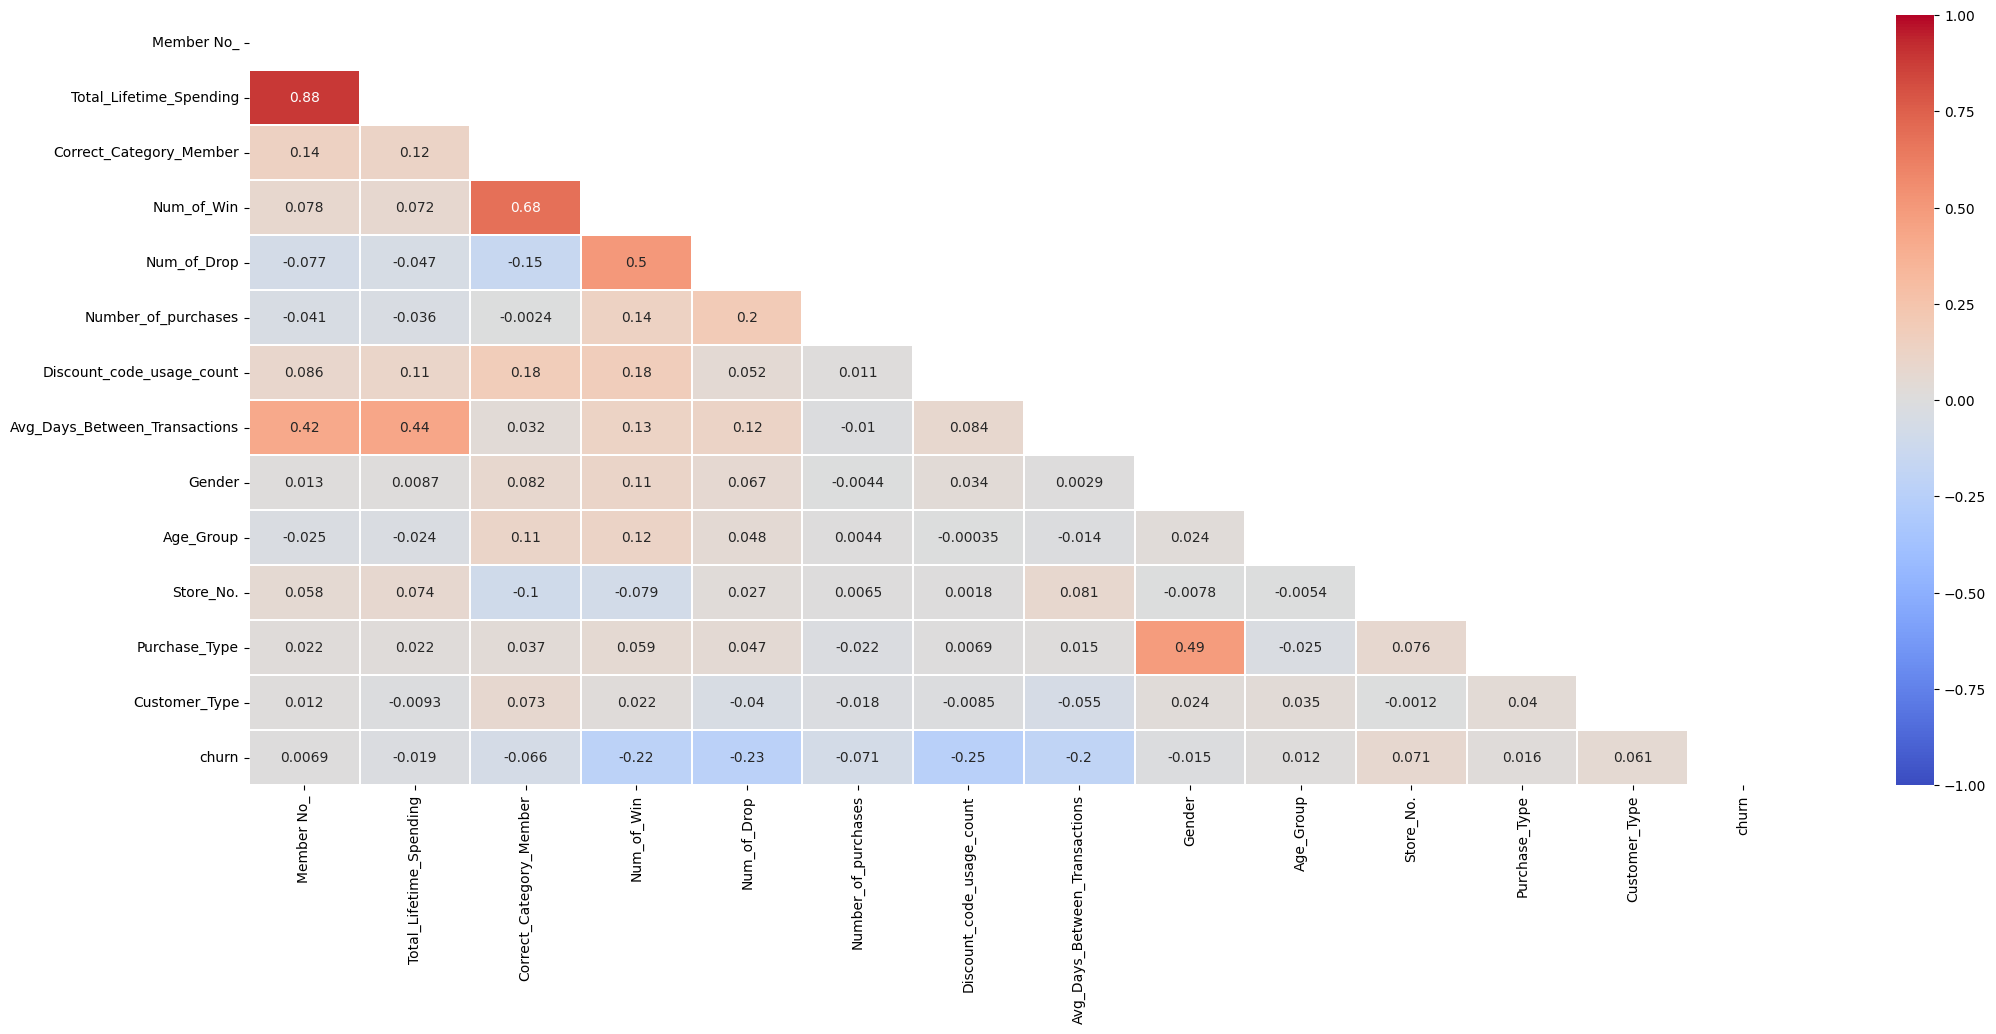

In [ ]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
plt.figure(figsize=(14,7))
df.corr()['churn'].sort_values(ascending = False)

churn                            1.000000
Num_of_Win                      -0.224797
Num_of_Drop                     -0.230099
Total_Lifetime_Spending         -0.288199
Avg_Days_Between_Transactions   -0.291049
Discount_code_usage_count       -0.297079
Number_of_purchases             -0.390999
Name: churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

**Nhận xét:* Ta thấy các biến số của dataset của có tương quan theo hướng tiêu cực - mức yếu đối với biến target. Cần kết hợp kiểm định t-test

* T-test

In [ ]:
def t_test_evalue(df, att):
    group_churn = df[df['churn'] == 1][att]
    group_no_churn = df[df['churn'] == 0][att]

    statistic, p_value = ttest_ind(group_churn, group_no_churn)

    print(f'T-Statistic: {statistic}')
    print(f'P-Value: {p_value}')

    alpha = 0.05
    if p_value < alpha:
        print(f"{att} - Có ý nghĩa thống kê: Có sự khác biệt giữa nhóm churn và không churn.")
    else:
        print(f"{att} - Không có ý nghĩa thống kê: Không có sự khác biệt giữa nhóm churn và không churn.")
    print('\n')

In [ ]:
num_list = ['Num_of_Win','Num_of_Drop', 'Total_Lifetime_Spending', 'Avg_Days_Between_Transactions', 'Discount_code_usage_count', 'Number_of_purchases']
for att in num_list:
    t_test_evalue(df,att)

T-Statistic: -16.34242333870739
P-Value: 1.5644581644716007e-58
Num_of_Win - Có ý nghĩa thống kê: Có sự khác biệt giữa nhóm churn và không churn.


T-Statistic: -16.7491049902283
P-Value: 2.5894839635024144e-61
Num_of_Drop - Có ý nghĩa thống kê: Có sự khác biệt giữa nhóm churn và không churn.


T-Statistic: -21.319981164938756
P-Value: 1.276583775395419e-96
Total_Lifetime_Spending - Có ý nghĩa thống kê: Có sự khác biệt giữa nhóm churn và không churn.


T-Statistic: -21.550256636853565
P-Value: 1.3738720940225522e-98
Avg_Days_Between_Transactions - Có ý nghĩa thống kê: Có sự khác biệt giữa nhóm churn và không churn.


T-Statistic: -22.039443610721946
P-Value: 7.928572731165785e-103
Discount_code_usage_count - Có ý nghĩa thống kê: Có sự khác biệt giữa nhóm churn và không churn.


T-Statistic: -30.093219853470103
P-Value: 4.704234747310055e-183
Number_of_purchases - Có ý nghĩa thống kê: Có sự khác biệt giữa nhóm churn và không churn.




**Nhận xét:*Toàn bộ biến số đều có ý nghĩa thống kê - Có sự khác biệt giữa nhóm churn và not churn để dự đoán phân loại.

* Kiểm định Chi-square cho biến categorical

In [ ]:
from scipy.stats import chi2_contingency

def chi_square_evalue(df, att):
    contingency_table = pd.crosstab(df[att], df['churn'])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Print the results
    print(f"Column: {att}")
    print(f"Chi-square value: {chi2}")
    print(f"P-value: {p}")

    alpha = 0.05
    if p < alpha:
        print(f"Có đủ bằng chứng để bác bỏ giả thuyết không có mối quan hệ giữa {att} và 'churn'.")
    else:
        print(f"Không có đủ bằng chứng để bác bỏ giả thuyết không có mối quan hệ giữa {att} và 'churn'.")
    print('\n')

In [ ]:
cate_list = ['Correct_Category_Member', 'Gender', 'Age_Group', 'Store_No.', 'Purchase_Type', 'Customer_Type']
for att in cate_list:
    chi_square_evalue(df,att)

Column: Correct_Category_Member
Chi-square value: 24.875656449510497
P-value: 3.965699797502235e-06
Có đủ bằng chứng để bác bỏ giả thuyết không có mối quan hệ giữa Correct_Category_Member và 'churn'.


Column: Gender
Chi-square value: 14.402499999404954
P-value: 0.0007456531593652664
Có đủ bằng chứng để bác bỏ giả thuyết không có mối quan hệ giữa Gender và 'churn'.


Column: Age_Group
Chi-square value: 27.215336120073022
P-value: 5.1790117193246614e-05
Có đủ bằng chứng để bác bỏ giả thuyết không có mối quan hệ giữa Age_Group và 'churn'.


Column: Store_No.
Chi-square value: 25.79297005942339
P-value: 2.5068463483633656e-06
Có đủ bằng chứng để bác bỏ giả thuyết không có mối quan hệ giữa Store_No. và 'churn'.


Column: Purchase_Type
Chi-square value: 16.12486451031313
P-value: 0.0003151593244332724
Có đủ bằng chứng để bác bỏ giả thuyết không có mối quan hệ giữa Purchase_Type và 'churn'.


Column: Customer_Type
Chi-square value: 48.41696676107405
P-value: 3.0647090625826375e-11
Có đủ bằng

**Nhận xét:* Toàn bộ các biến categorical đều có mối quan hệ đối với churn

→ Giữ toàn bộ thuộc tính để huấn luyện mô hình dự đoán

###Pre-Processing

* Sắp xếp lại thứ tự các thuộc tính trong data set: biến target → các biến số → các biến phân loại

In [ ]:
df_train = df[['churn'] + num_list + cate_list]
df_train.head()

,churn,Num_of_Win,Num_of_Drop,Total_Lifetime_Spending,Avg_Days_Between_Transactions,Discount_code_usage_count,Number_of_purchases,Correct_Category_Member,Gender,Age_Group,Store_No.,Purchase_Type,Customer_Type
0,0,0,0,20655000,38.468750,1,11,Bronze,Male,25-34 Years,HN,Gift to Others,Individual
1,1,1,0,27830000,46.428571,0,5,Silver,Female,18-24 Years,HCM,For Self,Individual
2,0,2,1,43576000,290.142857,8,6,Silver,Male,Unknown,HN,For Self,Individual
3,0,0,0,22744500,127.700000,3,10,Bronze,Female,Unknown,HN,For Self,Individual
4,1,1,0,24720000,15.750000,0,4,Silver,Female,Unknown,HCM,For Self,Individual


* Sử dụng LabelEncoder() để chuẩn hóa các biến phân loại

In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df_train = df_train.apply(lambda x: object_to_int(x))
df_train.head()

,churn,Num_of_Win,Num_of_Drop,Total_Lifetime_Spending,Avg_Days_Between_Transactions,Discount_code_usage_count,Number_of_purchases,Correct_Category_Member,Gender,Age_Group,Store_No.,Purchase_Type,Customer_Type
0,0,0,0,20655000,38.468750,1,11,0,1,1,1,1,1
1,1,1,0,27830000,46.428571,0,5,2,0,0,0,0,1
2,0,2,1,43576000,290.142857,8,6,2,1,5,1,0,1
3,0,0,0,22744500,127.700000,3,10,0,0,5,1,0,1
4,1,1,0,24720000,15.750000,0,4,2,0,5,0,0,1


* Thực hiện gán các nhãn đại diện cho Missing values thành các giá trị -1 để model dự đoán được chúng ở dạng tiêu cực

In [ ]:
df_train['Correct_Category_Member'].value_counts()

2    3650
0     866
1     504
Name: Correct_Category_Member, dtype: int64

In [ ]:
df_train['Store_No.'].value_counts()

0    2997
1    1810
2     213
Name: Store_No., dtype: int64

In [ ]:
df_train['Gender'].value_counts()

0    4310
1     639
2      71
Name: Gender, dtype: int64

In [ ]:
df_train['Age_Group'].value_counts()

1    2169
0    1159
2     973
5     533
3     171
4      15
Name: Age_Group, dtype: int64

In [ ]:
df_train['Purchase_Type'].value_counts()

0    4309
1     593
2     118
Name: Purchase_Type, dtype: int64

In [ ]:
df_train['Customer_Type'].value_counts()

1    4802
2     125
0      93
Name: Customer_Type, dtype: int64

In [ ]:
df_train.loc[df_train.Gender == 2, 'Gender'] = -1
df_train.loc[df_train.Age_Group == 5, 'Age_Group'] = -1
df_train.loc[df_train.Purchase_Type == 2, 'Purchase_Type'] = -1
df_train.loc[df_train.Customer_Type == 2, 'Customer_Type'] = -1

* Thực hiện chuẩn hóa các biến số bằng Min-Max scale()

In [ ]:
num_list = ['Num_of_Win','Num_of_Drop', 'Total_Lifetime_Spending', 'Avg_Days_Between_Transactions', 'Discount_code_usage_count', 'Number_of_purchases']
#min-max scale
minVec = df_train[num_list].min().copy()
maxVec = df_train[num_list].max().copy()
df_train[num_list] = (df_train[num_list]-minVec)/(maxVec-minVec)
df_train.head()

,churn,Num_of_Win,Num_of_Drop,Total_Lifetime_Spending,Avg_Days_Between_Transactions,Discount_code_usage_count,Number_of_purchases,Correct_Category_Member,Gender,Age_Group,Store_No.,Purchase_Type,Customer_Type
0,0,0.0,0.000000,0.089022,0.055386,0.020408,0.384615,0,1,1,1,1,1
1,1,0.2,0.000000,0.121774,0.067152,0.000000,0.153846,2,0,0,0,0,1
2,0,0.4,0.333333,0.193650,0.427410,0.163265,0.192308,2,1,5,1,0,1
3,0,0.0,0.000000,0.098560,0.187288,0.061224,0.346154,0,0,5,1,0,1
4,1,0.2,0.000000,0.107577,0.021803,0.000000,0.115385,2,0,5,0,0,1


* Chia data thành tập Train - Test theo tỉ lệ 7-3

In [ ]:
X = df_train.drop(columns = ['churn'])
y = df_train['churn'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 42, stratify=y)

###Training

Phương pháp của chúng em theo thứ tự sau
1. Dùng GridSearchCV để tìm các tham số tốt nhất cho mô hình
2. Huấn luyện mô hình với các tham số tốt nhất vừa tìm được
3. Thực hiện kiểm tra chéo sử dụng cross-check để đánh giá mô hình


In [ ]:
score = make_scorer(accuracy_score)

In [ ]:
def best_model(model):
    print(model.best_score_)
    print(model.best_params_)
    print(model.best_estimator_)

####LogisticRegression

In [ ]:
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250,500,1000], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
LR_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
LR_Grid.fit(X_train, y_train)
best_model(LR_Grid)

0.7936925343175344
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=50, max_iter=250, tol=1e-05)


In [ ]:
LR_model = LogisticRegression(C = 50, max_iter=250, penalty='l2', fit_intercept=True, tol=1e-05, intercept_scaling=1)
LR_model.fit(X_train, y_train)
predictions_LR = LR_model.predict(X_test)
accuracy_LR = accuracy_score(y_test, predictions_LR)
print("LogisticRegression accuracy:",accuracy_LR)

LogisticRegression accuracy: 0.8027888446215139


In [ ]:
LR = LogisticRegression(C = 50, max_iter=250, penalty='l2', fit_intercept=True, tol=1e-05, intercept_scaling=1)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(LR, X, y, cv=cv, scoring=score)

array([0.78552457, 0.8001328 , 0.81341301, 0.79415671, 0.79282869])

In [ ]:
print(classification_report(y_test, predictions_LR, digits=4))

              precision    recall  f1-score   support

           0     0.7045    0.4593    0.5561       405
           1     0.8237    0.9292    0.8732      1101

    accuracy                         0.8028      1506
   macro avg     0.7641    0.6942    0.7146      1506
weighted avg     0.7916    0.8028    0.7879      1506



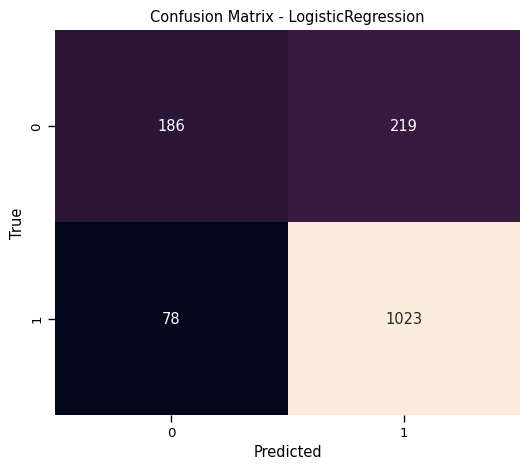

In [ ]:
cm1 = confusion_matrix(y_test, predictions_LR)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm1, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - LogisticRegression')
plt.show()

####LogisticRegression-fit Poly (degree = 2)

In [ ]:
poly2 = PolynomialFeatures(degree=2)
X_train_poly = poly2.fit_transform(X_train)
X_test_poly = poly2.fit_transform(X_test)

In [ ]:
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250,500,1000], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
LR_Grid2 = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
LR_Grid2.fit(X_train_poly, y_train)
best_model(LR_Grid2)

0.8486151579901581
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 500, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=50, max_iter=500, tol=1e-05)


In [ ]:

LR_model2 = LogisticRegression(C = 50, max_iter=500, penalty='l2', fit_intercept=True, tol=1e-05, intercept_scaling=1)
LR_model2.fit(X_train_poly , y_train)
predictions_LR2 = LR_model2.predict(X_test_poly)
accuracy_LR2 = accuracy_score(y_test, predictions_LR2)
print("LogisticRegression accuracy:",accuracy_LR2)

LogisticRegression accuracy: 0.851925630810093


In [ ]:
X_poly = poly2.fit_transform(X)
LR2 = LogisticRegression(C = 50, max_iter=500, penalty='l2', fit_intercept=True, tol=1e-05, intercept_scaling=1)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(LR2, X_poly, y, cv=cv, scoring=score)

array([0.83266932, 0.85391766, 0.84329349, 0.83798141, 0.84130146])

In [ ]:
print(classification_report(y_test, predictions_LR2, digits=4))

              precision    recall  f1-score   support

           0     0.7898    0.6123    0.6898       405
           1     0.8683    0.9401    0.9027      1101

    accuracy                         0.8519      1506
   macro avg     0.8290    0.7762    0.7963      1506
weighted avg     0.8472    0.8519    0.8455      1506



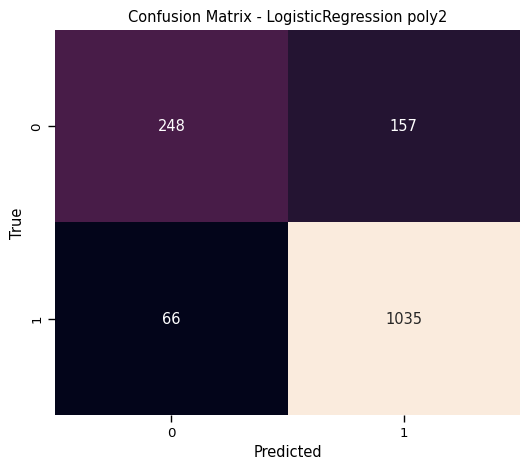

In [ ]:
cm2 = confusion_matrix(y_test, predictions_LR2)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm2, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - LogisticRegression poly2')
plt.show()

####SVM

In [ ]:
param_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[2,3] }
SVM_grid = GridSearchCV(SVC(), param_grid, cv=5, refit=True, verbose=0)
SVM_grid.fit(X_train, y_train)
best_model(SVM_grid)

0.8358021989600937
{'C': 100, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
SVC(C=100, gamma=0.1, kernel='poly', probability=True)


In [ ]:
svm_model = SVC(C = 100, degree=  3, gamma = 0.1, kernel='poly',  probability = True)
svm_model.fit(X_train,y_train)
predictions_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, predictions_svm)
print("SVM accuracy:",accuracy_svm)

SVM accuracy: 0.8452855245683931


In [ ]:
SVM = SVC(C = 100, degree=  3, gamma = 0.1, kernel='poly',  probability = True)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(SVM, X, y, cv=cv, scoring=score)

array([0.83200531, 0.84196547, 0.84727756, 0.83333333, 0.82802125])

In [ ]:
print(classification_report(y_test, predictions_svm, digits=4))

              precision    recall  f1-score   support

           0     0.8525    0.5136    0.6410       405
           1     0.8439    0.9673    0.9014      1101

    accuracy                         0.8453      1506
   macro avg     0.8482    0.7404    0.7712      1506
weighted avg     0.8462    0.8453    0.8314      1506



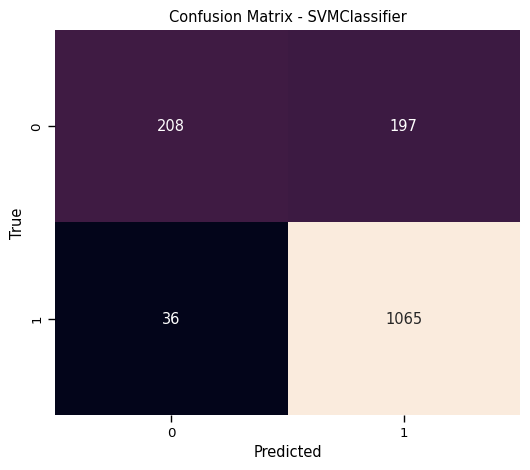

In [ ]:
cm3 = confusion_matrix(y_test, predictions_svm)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm3, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVMClassifier')
plt.show()

####RandomForest

In [ ]:
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RF_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RF_grid.fit(X_train, y_train)
best_model(RF_grid)

0.8702366333945282
{'max_depth': 7, 'max_features': 6, 'min_samples_split': 5, 'n_estimators': 100}
RandomForestClassifier(max_depth=7, max_features=6, min_samples_split=5)


In [ ]:
model_rf = RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=7,n_estimators=50, random_state =42)
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predictions_rf)
print("RandomForest accuracy:",accuracy_rf)

RandomForest accuracy: 0.8824701195219123


In [ ]:
RF = RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=7,n_estimators=50, random_state =42)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(RF, X, y, cv=cv, scoring=score)

array([0.85126162, 0.87250996, 0.88645418, 0.8685259 , 0.87383798])

In [ ]:
print(classification_report(y_test, predictions_rf, digits=4))

              precision    recall  f1-score   support

           0     0.7850    0.7753    0.7801       405
           1     0.9177    0.9219    0.9198      1101

    accuracy                         0.8825      1506
   macro avg     0.8514    0.8486    0.8500      1506
weighted avg     0.8820    0.8825    0.8822      1506



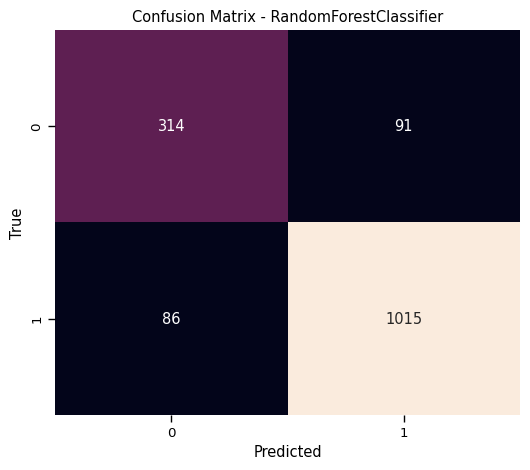

In [ ]:
cm4 = confusion_matrix(y_test, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm4, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - RandomForestClassifier')
plt.show()

####Gradient Boosting

In [ ]:
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
xgb_grid = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(X_train, y_train)
best_model(xgb_grid)

0.8696672380882908
{'max_depth': 5, 'max_features': 9, 'min_samples_split': 5, 'n_estimators': 50}
GradientBoostingClassifier(max_depth=5, max_features=9, min_samples_split=5,
                           n_estimators=50)


In [ ]:
model_xgb= GradientBoostingClassifier(max_depth=5, max_features=9, min_samples_split=3,
                           n_estimators=50, random_state =42)
model_xgb.fit(X_train, y_train)

predictions_xgb = model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, predictions_xgb)
print("RandomForest accuracy:",accuracy_xgb)

RandomForest accuracy: 0.8811420982735724


In [ ]:
XGB = GradientBoostingClassifier(max_depth=5, max_features=9, min_samples_split=3,
                           n_estimators=50, random_state =42)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(XGB, X, y, cv=cv, scoring=score)

array([0.85126162, 0.86719788, 0.88645418, 0.86985392, 0.87649402])

In [ ]:
print(classification_report(y_test, predictions_xgb, digits=4))

              precision    recall  f1-score   support

           0     0.7868    0.7654    0.7760       405
           1     0.9146    0.9237    0.9191      1101

    accuracy                         0.8811      1506
   macro avg     0.8507    0.8446    0.8475      1506
weighted avg     0.8802    0.8811    0.8806      1506



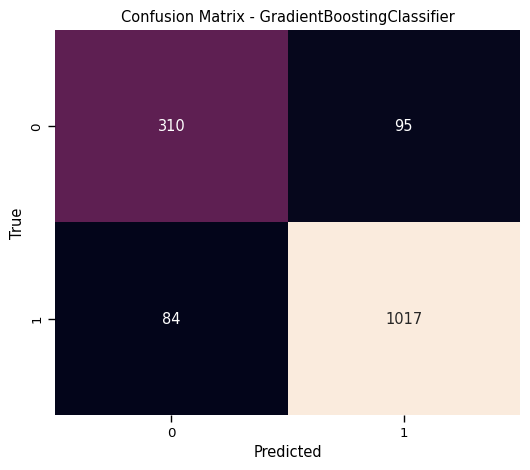

In [ ]:
cm5 = confusion_matrix(y_test, predictions_xgb)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm5, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - GradientBoostingClassifier')
plt.show()

* Kết quả thu được mô hình Random Forest Classifier cho kết quả tốt nhất với:
    - accuracy: 0.8825
    - precision: 0.8514
    - recall: 0.8486
    - f1-score: 0.8500

###Save Model

In [ ]:
import joblib
joblib.dump(LR_model,'/content/logistic_model.pkl')
joblib.dump(LR_model2, '/content/logistic_model_poly2.pkl')
joblib.dump(svm_model, '/content/svm_model.pkl')
joblib.dump(model_rf, '/content/rf_model.pkl')
joblib.dump(model_xgb, '/content/xgb_model.pkl')


['/content/xgb_model.pkl']

###Evalue

In [ ]:
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method);
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2);
    return (auc_score, fpr_df, tpr_df)

In [ ]:
acc_LR, fpr_LR, tpr_LR = get_auc_scores(y_test, LR_model.predict(X_test), LR_model.predict_proba(X_test)[:,1])
acc_LR2, fpr_LR2, tpr_LR2 = get_auc_scores(y_test, LR_model2.predict(X_test_poly), LR_model2.predict_proba(X_test_poly)[:,1])
acc_svm, fpr_svm, tpr_svm = get_auc_scores(y_test, svm_model.predict(X_test), svm_model.predict_proba(X_test)[:,1])
acc_rf, fpr_rf, tpr_rf = get_auc_scores(y_test, model_rf.predict(X_test), model_rf.predict_proba(X_test)[:,1])
acc_gbm, fpr_gbm, tpr_gbm = get_auc_scores(y_test, model_xgb.predict(X_test), model_xgb.predict_proba(X_test)[:,1])

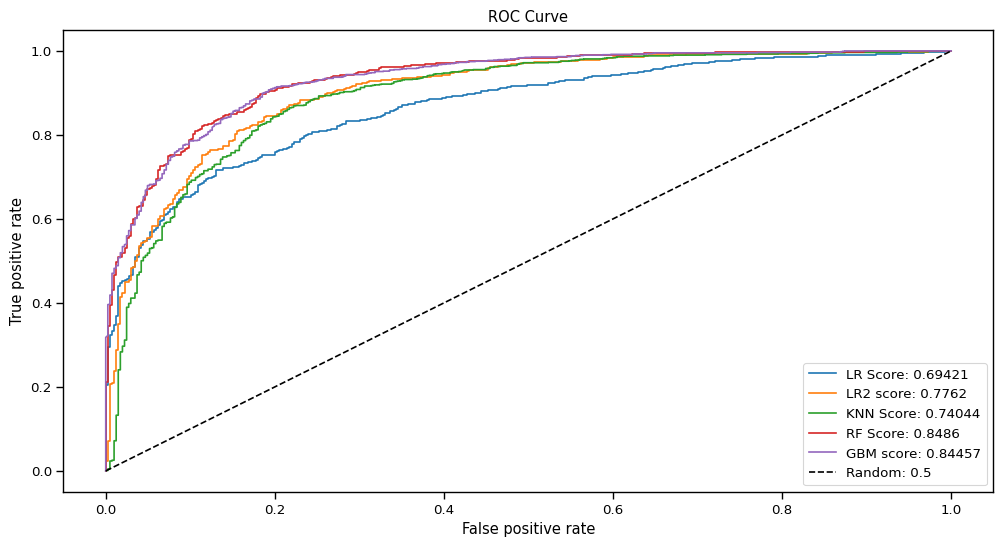

In [ ]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_LR, tpr_LR, label = 'LR Score: ' + str(round(acc_LR, 5)))
plt.plot(fpr_LR2, tpr_LR2, label = 'LR2 score: ' + str(round(acc_LR2, 5)))
plt.plot(fpr_svm, tpr_svm, label = 'KNN Score: ' + str(round(acc_svm, 5)))
plt.plot(fpr_rf, tpr_rf, label = 'RF Score: ' + str(round(acc_rf, 5)))
plt.plot(fpr_gbm, tpr_gbm, label = 'GBM score: ' + str(round(acc_gbm, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

- ROC (Receiver Operating Characteristic) là một đồ thị biểu diễn khả năng phân loại của một mô hình dự đoán. Đường cong ROC biểu thị mức độ tách biệt giữa các lớp dự đoán và được tính toán bằng cách vẽ đường cong dựa trên hai yếu tố: tỷ lệ chính xác đúng dương và tỷ lệ sai dương. Diện tích dưới đường cong ROC (AUC - Area Under the Curve) thường được sử dụng để đánh giá độ chính xác của mô hình dự đoán. Điều này được thể hiện qua tỷ lệ diện tích dưới đường cong ROC với diện tích toàn bộ không gian được biểu diễn bởi đường cong. Qua đó, giá trị AUC càng lớn, mô hình dự đoán càng chính xác.

**→ 2 mô hình Random Forest Gradient và Boosting cho đường cong mở rồng về phía trên cùng bên trái nhiều nhất → diện tích lớn nhất → hai mô hình cho kết quả dự đoán trên tập dữ liệu khách hàng rời bỏ tốt nhất trong số các mô hình thử nghiệm.**

#+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+